In [1]:
import analysis_functions as af

import pandas as pd
import numpy as np
import re
import os
import matplotlib.pyplot as plt



In [2]:
true_cols = [
    'B_0' , 'B_1'
]
beta_file_path = 'Beta_t_Xy_N=400_Epoch_N=40_Nt=4_p=2.csv'

In [3]:
input_path = "results_emb_par_fit_test_with_commXy_N=400_Epoch_N=40_Nt=4_p=2_part_num=10_exp_num=-1.csv"
ddd = pd.read_csv(input_path)
print(ddd.shape)
ddd.head()

(11, 24)


shards  Xy_N=  Epoch_N=  N_Node=  Nt=  p=  exp_number  data_type  \
0       4    400        40        4    4   2          -1  synthetic   
1       4    400        40        4    4   2          -1  synthetic   
2       4    400        40        4    4   2          -1  synthetic   
3       4    400        40        4    4   2          -1  synthetic   
4       4    400        40        4    4   2          -1  synthetic   

   particle_number particle_filter_run_time  \
0               10                      999   
1               10                      999   
2               10                      999   
3               10                      999   
4               10                      999   

                         ...                              end_time  \
0                        ...                          1.579701e+09   
1                        ...                          1.579701e+09   
2                        ...                          1.579701e+09   
3                        ...                          1.579701e+09   
4                        ...                          1.579701e+09   

                   code                                       final_params  \
0  dffqarifnmkmmwxynaaz  [array([[ 0.19293946, -0.75179624],\n       [ ...   
1  dffqarifnmkmmwxynaaz  [array([[ 2.1785192 , -1.36572139],\n       [ ...   
2  dffqarifnmkmmwxynaaz  [array([[ 1.20653115, -0.9924813 ],\n       [ ...   
3  dffqarifnmkmmwxynaaz  [array([[ 1.50959607,  0.63967747],\n       [ ...   
4  dffqarifnmkmmwxynaaz  [array([[ 3.00277954, -0.14950482],\n       [ ...   

   run_number                                 pre_shuffel_params  \
0         0.0  [array([[ 0.19293946, -0.75179624],\n       [ ...   
1         1.0  [array([[ 2.1785192 , -1.36572139],\n       [ ...   
2         2.0  [array([[ 1.20653115, -0.9924813 ],\n       [ ...   
3         3.0  [array([[ 1.50959607,  0.63967747],\n       [ ...   
4         4.0  [array([[ 3.00277954, -0.14950482],\n       [ ...   

                                 post_shuffel_params  \
0  [[[0.25011661193162493, 0.6978275651150978], [...   
1  [[[0.5083222437089339, -0.030530616839016336],...   
2  [[[0.7647008188068652, -0.4714047519500091], [...   
3  [[[-0.03294407552235867, 1.7399817864070974], ...   
4  [[[3.002779537444656, -0.14950482024702888], [...   

                                 machine_history_ids  \
0  [array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0....   
1  [array([1., 3., 0., 2., 0., 1., 2., 3., 1., 3....   
2  [array([3., 3., 3., 3., 1., 1., 2., 3., 3., 0....   
3  [array([3., 3., 3., 3., 2., 3., 3., 3., 1., 3....   
4  [array([1., 0., 1., 0., 3., 3., 0., 3., 0., 3....   

                            post_machine_history_ids  \
0  [[1.0, 3.0, 0.0, 2.0, 0.0, 1.0, 2.0, 3.0, 1.0,...   
1  [[3.0, 3.0, 3.0, 3.0, 1.0, 1.0, 2.0, 3.0, 3.0,...   
2  [[3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 1.0,...   
3  [[1.0, 0.0, 1.0, 0.0, 3.0, 3.0, 0.0, 3.0, 0.0,...   
4  [[3.0, 1.0, 3.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...   

                                particle_history_ids  \
0  [array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9....   
1  [array([4., 5., 8., 4., 9., 6., 9., 1., 0., 6....   
2  [array([1., 0., 0., 1., 7., 3., 4., 5., 0., 9....   
3  [array([1., 5., 0., 1., 7., 0., 5., 0., 9., 1....   
4  [array([3., 0., 9., 9., 1., 0., 0., 5., 0., 0....   

                           post_particle_history_ids  
0  [[4.0, 5.0, 8.0, 4.0, 9.0, 6.0, 9.0, 1.0, 0.0,...  
1  [[1.0, 0.0, 0.0, 1.0, 7.0, 3.0, 4.0, 5.0, 0.0,...  
2  [[1.0, 5.0, 0.0, 1.0, 7.0, 0.0, 5.0, 0.0, 9.0,...  
3  [[3.0, 0.0, 9.0, 9.0, 1.0, 0.0, 0.0, 5.0, 0.0,...  
4  [[1.0, 3.0, 5.0, 9.0, 9.0, 3.0, 9.0, 9.0, 9.0,...  

[5 rows x 24 columns]

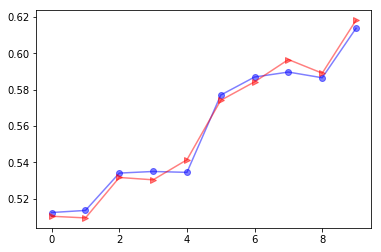

In [4]:
step_size = 10 # * 4 = Epoch_N
pre_run = af.analyze_run(input_path, beta_file_path, step_size, true_cols, comm = True, col='pre_shuffel_params')

post_run = af.analyze_run(input_path, beta_file_path, step_size, true_cols, comm = True, col='post_shuffel_params')

plt.plot(pre_run.esti_lik, color = 'b', alpha=0.5, marker='o')
plt.plot(post_run.esti_lik, color = 'r', alpha=0.5, marker='>')
plt.show()

In [5]:
print(ddd.machine_history_ids)
ddd.post_machine_history_ids

0     [array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0....
1     [array([1., 3., 0., 2., 0., 1., 2., 3., 1., 3....
2     [array([3., 3., 3., 3., 1., 1., 2., 3., 3., 0....
3     [array([3., 3., 3., 3., 2., 3., 3., 3., 1., 3....
4     [array([1., 0., 1., 0., 3., 3., 0., 3., 0., 3....
5     [array([3., 1., 3., 0., 0., 1., 0., 0., 0., 0....
6     [array([0., 1., 0., 0., 1., 2., 0., 0., 0., 0....
7     [array([0., 1., 2., 3., 3., 0., 0., 1., 3., 3....
8     [array([1., 2., 1., 1., 0., 0., 3., 1., 0., 0....
9     [array([0., 3., 1., 1., 1., 1., 3., 0., 3., 1....
10                                                  NaN
Name: machine_history_ids, dtype: object


0     [[1.0, 3.0, 0.0, 2.0, 0.0, 1.0, 2.0, 3.0, 1.0,...
1     [[3.0, 3.0, 3.0, 3.0, 1.0, 1.0, 2.0, 3.0, 3.0,...
2     [[3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 1.0,...
3     [[1.0, 0.0, 1.0, 0.0, 3.0, 3.0, 0.0, 3.0, 0.0,...
4     [[3.0, 1.0, 3.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...
5     [[0.0, 1.0, 0.0, 0.0, 1.0, 2.0, 0.0, 0.0, 0.0,...
6     [[0.0, 1.0, 2.0, 3.0, 3.0, 0.0, 0.0, 1.0, 3.0,...
7     [[1.0, 2.0, 1.0, 1.0, 0.0, 0.0, 3.0, 1.0, 0.0,...
8     [[0.0, 3.0, 1.0, 1.0, 1.0, 1.0, 3.0, 0.0, 3.0,...
9     [[1.0, 3.0, 1.0, 0.0, 0.0, 0.0, 3.0, 1.0, 0.0,...
10                                                  NaN
Name: post_machine_history_ids, dtype: object

In [6]:
ddd.head()

shards  Xy_N=  Epoch_N=  N_Node=  Nt=  p=  exp_number  data_type  \
0       4    400        40        4    4   2          -1  synthetic   
1       4    400        40        4    4   2          -1  synthetic   
2       4    400        40        4    4   2          -1  synthetic   
3       4    400        40        4    4   2          -1  synthetic   
4       4    400        40        4    4   2          -1  synthetic   

   particle_number particle_filter_run_time  \
0               10                      999   
1               10                      999   
2               10                      999   
3               10                      999   
4               10                      999   

                         ...                              end_time  \
0                        ...                          1.579701e+09   
1                        ...                          1.579701e+09   
2                        ...                          1.579701e+09   
3                        ...                          1.579701e+09   
4                        ...                          1.579701e+09   

                   code                                       final_params  \
0  dffqarifnmkmmwxynaaz  [array([[ 0.19293946, -0.75179624],\n       [ ...   
1  dffqarifnmkmmwxynaaz  [array([[ 2.1785192 , -1.36572139],\n       [ ...   
2  dffqarifnmkmmwxynaaz  [array([[ 1.20653115, -0.9924813 ],\n       [ ...   
3  dffqarifnmkmmwxynaaz  [array([[ 1.50959607,  0.63967747],\n       [ ...   
4  dffqarifnmkmmwxynaaz  [array([[ 3.00277954, -0.14950482],\n       [ ...   

   run_number                                 pre_shuffel_params  \
0         0.0  [array([[ 0.19293946, -0.75179624],\n       [ ...   
1         1.0  [array([[ 2.1785192 , -1.36572139],\n       [ ...   
2         2.0  [array([[ 1.20653115, -0.9924813 ],\n       [ ...   
3         3.0  [array([[ 1.50959607,  0.63967747],\n       [ ...   
4         4.0  [array([[ 3.00277954, -0.14950482],\n       [ ...   

                                 post_shuffel_params  \
0  [[[0.25011661193162493, 0.6978275651150978], [...   
1  [[[0.5083222437089339, -0.030530616839016336],...   
2  [[[0.7647008188068652, -0.4714047519500091], [...   
3  [[[-0.03294407552235867, 1.7399817864070974], ...   
4  [[[3.002779537444656, -0.14950482024702888], [...   

                                 machine_history_ids  \
0  [array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0....   
1  [array([1., 3., 0., 2., 0., 1., 2., 3., 1., 3....   
2  [array([3., 3., 3., 3., 1., 1., 2., 3., 3., 0....   
3  [array([3., 3., 3., 3., 2., 3., 3., 3., 1., 3....   
4  [array([1., 0., 1., 0., 3., 3., 0., 3., 0., 3....   

                            post_machine_history_ids  \
0  [[1.0, 3.0, 0.0, 2.0, 0.0, 1.0, 2.0, 3.0, 1.0,...   
1  [[3.0, 3.0, 3.0, 3.0, 1.0, 1.0, 2.0, 3.0, 3.0,...   
2  [[3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 1.0,...   
3  [[1.0, 0.0, 1.0, 0.0, 3.0, 3.0, 0.0, 3.0, 0.0,...   
4  [[3.0, 1.0, 3.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...   

                                particle_history_ids  \
0  [array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9....   
1  [array([4., 5., 8., 4., 9., 6., 9., 1., 0., 6....   
2  [array([1., 0., 0., 1., 7., 3., 4., 5., 0., 9....   
3  [array([1., 5., 0., 1., 7., 0., 5., 0., 9., 1....   
4  [array([3., 0., 9., 9., 1., 0., 0., 5., 0., 0....   

                           post_particle_history_ids  
0  [[4.0, 5.0, 8.0, 4.0, 9.0, 6.0, 9.0, 1.0, 0.0,...  
1  [[1.0, 0.0, 0.0, 1.0, 7.0, 3.0, 4.0, 5.0, 0.0,...  
2  [[1.0, 5.0, 0.0, 1.0, 7.0, 0.0, 5.0, 0.0, 9.0,...  
3  [[3.0, 0.0, 9.0, 9.0, 1.0, 0.0, 0.0, 5.0, 0.0,...  
4  [[1.0, 3.0, 5.0, 9.0, 9.0, 3.0, 9.0, 9.0, 9.0,...  

[5 rows x 24 columns]

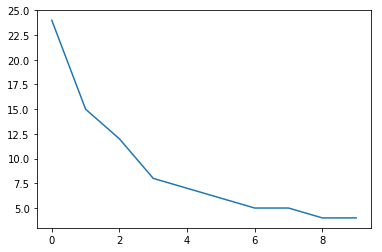

In [7]:
#pre_p_count=get_unique_particle_count_by_epoch_and_shard(pre_run, pre_post='pre')
#plt.plot(pre_p_count)
#plt.show()
#post_p_count=get_unique_particle_count_by_epoch_and_shard(post_run, pre_post='post')
#plt.plot(post_p_count)
#plt.show()
X = post_run.get_unique_particle_count_by_epoch(pre_post='post')
plt.plot(X)
#plt.show()
#plt.plot(pre_run.get_unique_particle_count_by_epoch(pre_post='pre'), alpha=0.9)


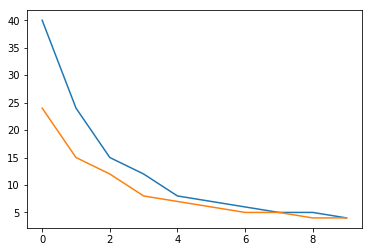

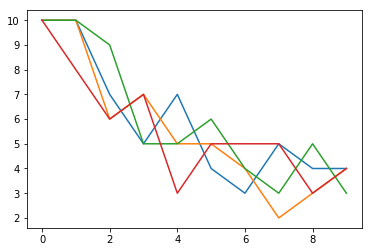

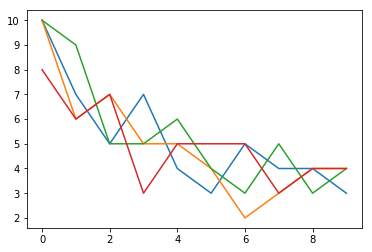

In [10]:
plt.plot(pre_run.get_unique_particle_count_by_epoch(pre_post='pre'))
plt.plot(post_run.get_unique_particle_count_by_epoch(pre_post='post'))
plt.show()
plt.plot(pre_run.get_unique_particle_count_by_epoch_and_shard(pre_post='pre'))
plt.show()
plt.plot(post_run.get_unique_particle_count_by_epoch_and_shard(pre_post='post'))

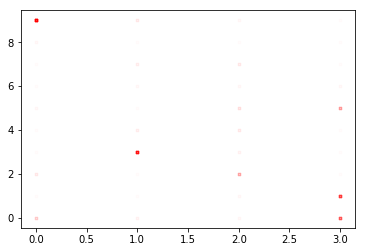

In [29]:
def plot_particle_density(run, f_alpha=0.01):
    for i in range(run.machine_history_ids.shape[0]):
        plt.plot(run.machine_history_ids[i,:], run.particle_history_ids[i,:], '.', color = 'r', alpha = f_alpha)
    
plot_particle_density(pre_run, f_alpha=0.01)

In [16]:
#run_num=6
#results_tuple_list = [
#    (no_comm_runs[run_num], with_comm_runs[run_num]),
#]
#
#res_colors=['g','r','b']
#res_markers=['o','v','+']
#particle_number=['1000']
#
#for i in range(results_tuple_list[0][0].beta_i_avg.shape[0]):
#    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
#    for tli in range(len(results_tuple_list)):
#        axes[0].plot(results_tuple_list[tli][0].Beta_com.iloc[:,i+1], '-')
#        axes[0].plot(
#            range(results_tuple_list[tli][0].beta_i_avg.shape[1]), 
#            results_tuple_list[tli][0].beta_i_avg[i,:],
#            '+', 
#            label = "No Comm,  "+ "PN=" + str(particle_number[tli]),
#            color = res_colors[tli]
#        )
#        axes[0].plot(
#            range(results_tuple_list[tli][1].beta_i_avg.shape[1]), 
#            results_tuple_list[tli][1].beta_i_avg[i,:], 
#            'v', 
#            label = "with Comm,  " "PN=" + str(particle_number[tli]),
#            color = res_colors[tli]
#        )
#        legend = axes[0].legend(loc='lower left', shadow=True, fontsize='medium')

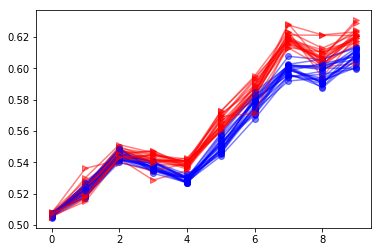

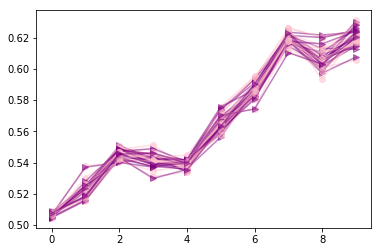

In [68]:
no_comm_runs = list()
with_comm_runs = list()
with_comm_pre = list()
with_comm_post = list()

for i in range(0,20):
    input_path = "results_emb_par_fit_test_no_commXy_N=400_Epoch_N=40_Nt=4_p=2_part_num=1000_exp_num="+str(i)+".csv"
    ddd = pd.read_csv(input_path)
    step_size = 10 # * 4 = Epoch_N
    no_comm_run_i = af.analyze_run(input_path, beta_file_path, step_size, true_cols, comm=False)
    no_comm_runs.append(no_comm_run_i)

    input_path = "results_emb_par_fit_test_with_commXy_N=400_Epoch_N=40_Nt=4_p=2_part_num=1000_exp_num="+str(i)+".csv"
    ddd = pd.read_csv(input_path)
    step_size = 10 # * 4 = Epoch_N
    with_comm_run_i = af.analyze_run(input_path, beta_file_path, step_size, true_cols, comm = True, col='final_params')
    with_comm_runs.append(with_comm_run_i)
    
    with_comm_pre_i = af.analyze_run(input_path, beta_file_path, step_size, true_cols, comm = True, col='pre_shuffel_params')
    with_comm_pre.append(with_comm_pre_i)
    
    with_comm_post_i = af.analyze_run(input_path, beta_file_path, step_size, true_cols, comm = True, col='post_shuffel_params')
    with_comm_post.append(with_comm_post_i)
    
    
    
for i in range(20):
    plt.plot(no_comm_runs[i].esti_lik, color = 'b', alpha=0.5, marker='o')
    plt.plot(with_comm_runs[i].esti_lik, color = 'r', alpha=0.5, marker='>')
plt.show()

for i in range(20):
    
    plt.plot(with_comm_pre[i].esti_lik, color = 'pink', alpha=0.5, marker='o')
    plt.plot(with_comm_post[i].esti_lik, color = 'purple', alpha=0.5, marker='>')
plt.show()

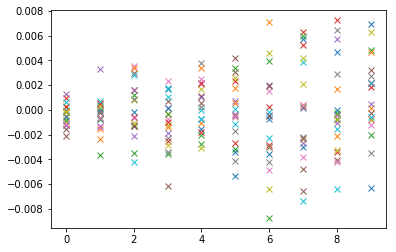

In [71]:
for i in range(20):
    plt.plot(np.array(with_comm_post[i].esti_lik) - np.array(with_comm_pre[i].esti_lik), 'x')
plt.show()

In [73]:
np.mean([np.mean(np.array(with_comm_post[i].esti_lik) - np.array(with_comm_pre[i].esti_lik)) for i in range(20)])


-0.00020807278348015986

(51, 18)
number of time epochs =  50
number of predictors =  100
number of particles accorss allshards =  1000
(100, 1000)
len(f_Betas_in_columns) 50
len(f_Betas_in_columns[0]) 100
len(f_Betas_in_columns[0][0]) 1000
type(f_Beta_com)= <class 'pandas.core.frame.DataFrame'>
type(f_beta_i_avg)= <class 'numpy.ndarray'>
f_Beta_com.shape= (50, 101)
f_beta_i_avg.shape= (100, 50)
(51, 19)
number of time epochs =  50
number of predictors =  100
number of particles accorss allshards =  1000
(100, 1000)
len(f_Betas_in_columns) 50
len(f_Betas_in_columns[0]) 100
len(f_Betas_in_columns[0][0]) 1000
type(f_Beta_com)= <class 'pandas.core.frame.DataFrame'>
type(f_beta_i_avg)= <class 'numpy.ndarray'>
f_Beta_com.shape= (50, 101)
f_beta_i_avg.shape= (100, 50)


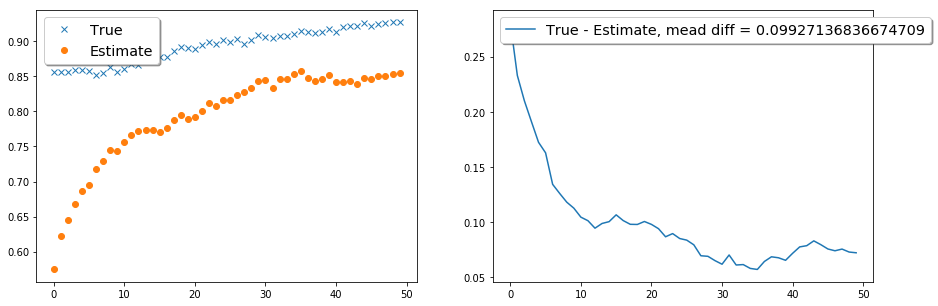

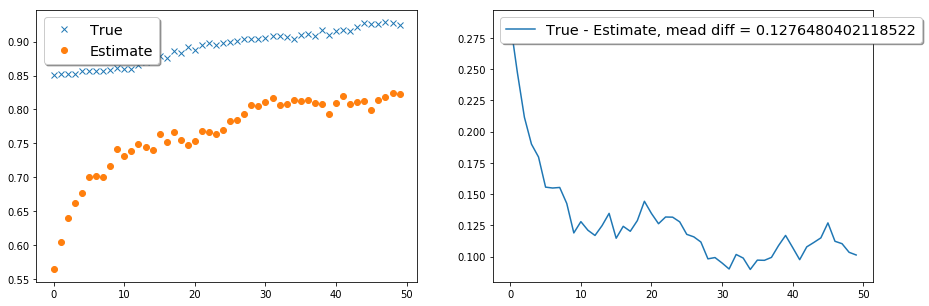

type(f_Beta_com)= <class 'pandas.core.frame.DataFrame'>
type(f_beta_i_avg)= <class 'numpy.ndarray'>
f_Beta_com.shape= (50, 101)
f_beta_i_avg.shape= (100, 50)
type(f_Beta_com)= <class 'pandas.core.frame.DataFrame'>
type(f_beta_i_avg)= <class 'numpy.ndarray'>
f_Beta_com.shape= (50, 101)
f_beta_i_avg.shape= (100, 50)
type(f_Beta_com)= <class 'pandas.core.frame.DataFrame'>
type(f_beta_i_avg)= <class 'numpy.ndarray'>
f_Beta_com.shape= (50, 101)
f_beta_i_avg.shape= (100, 50)
type(f_Beta_com)= <class 'pandas.core.frame.DataFrame'>
type(f_beta_i_avg)= <class 'numpy.ndarray'>
f_Beta_com.shape= (50, 101)
f_beta_i_avg.shape= (100, 50)
type(f_Beta_com)= <class 'pandas.core.frame.DataFrame'>
type(f_beta_i_avg)= <class 'numpy.ndarray'>
f_Beta_com.shape= (50, 101)
f_beta_i_avg.shape= (100, 50)
type(f_Beta_com)= <class 'pandas.core.frame.DataFrame'>
type(f_beta_i_avg)= <class 'numpy.ndarray'>
f_Beta_com.shape= (50, 101)
f_beta_i_avg.shape= (100, 50)
type(f_Beta_com)= <class 'pandas.core.frame.DataFram

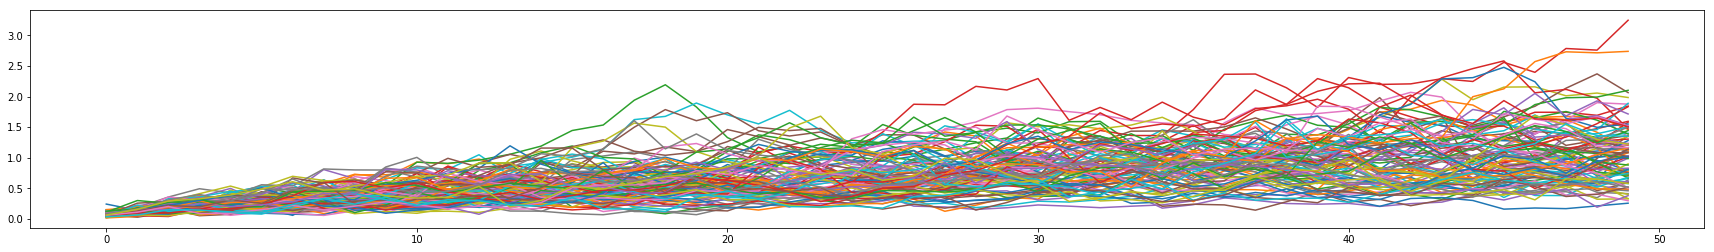

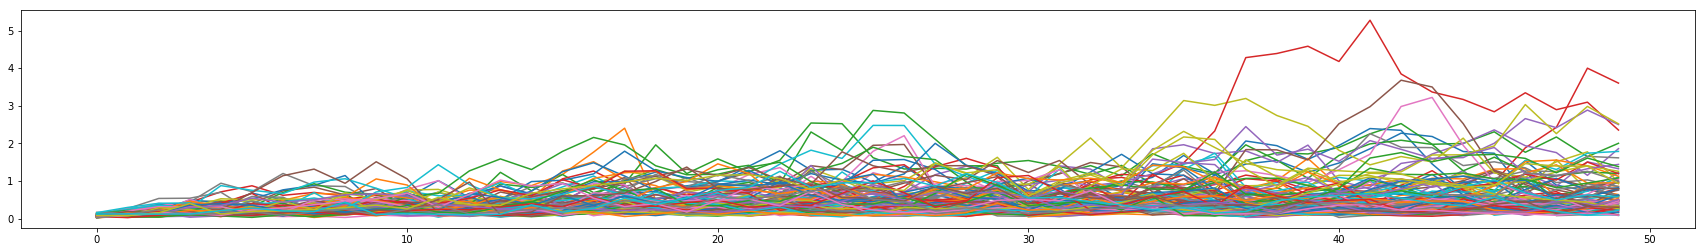

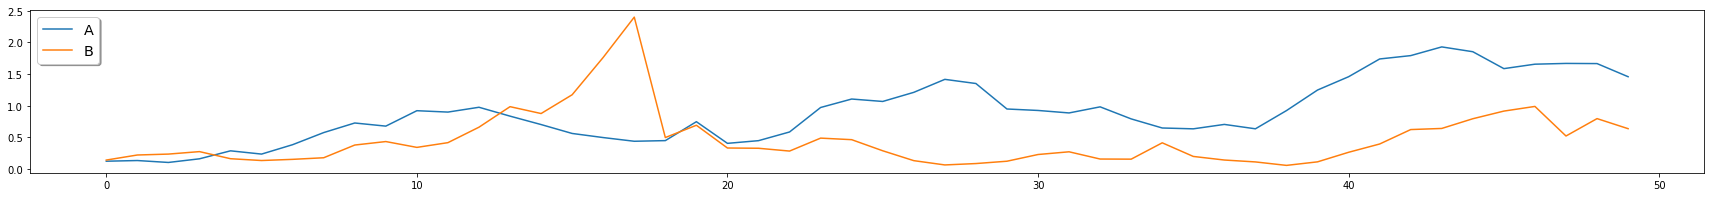

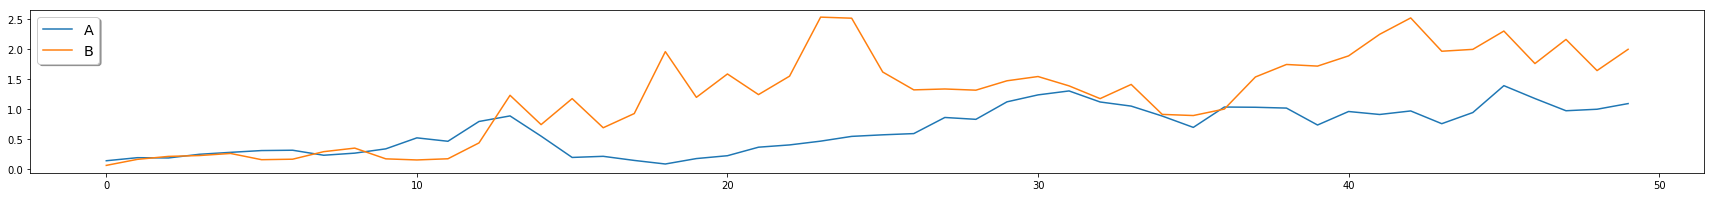

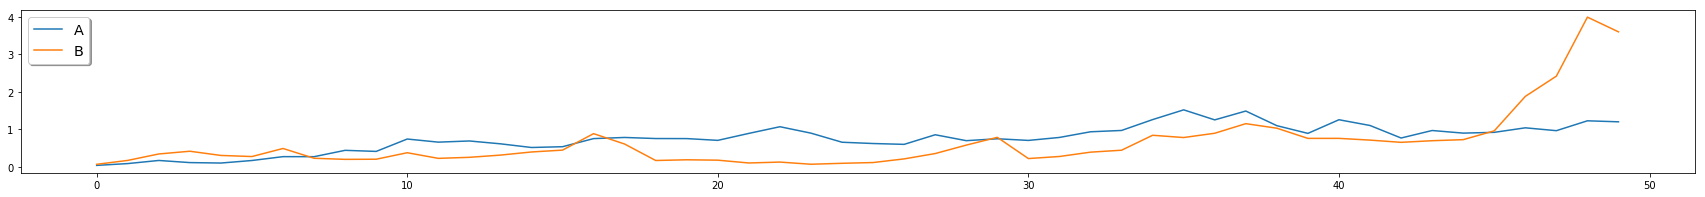

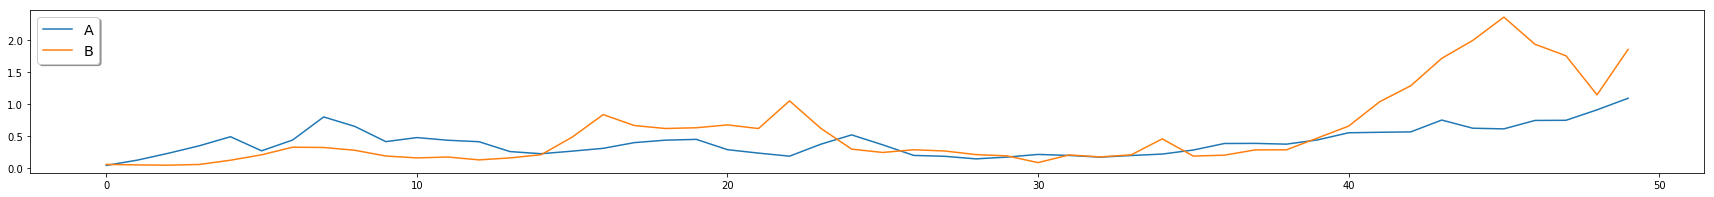

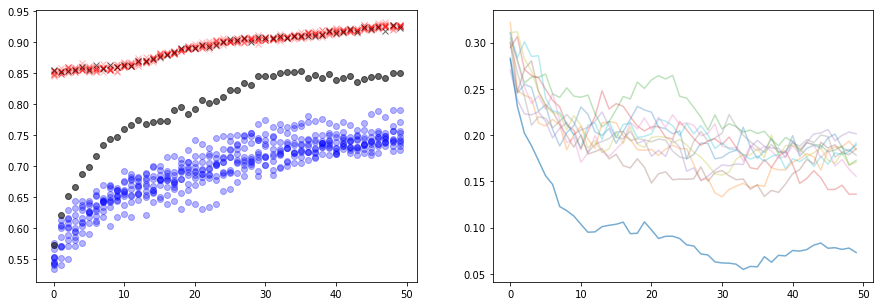

********************************


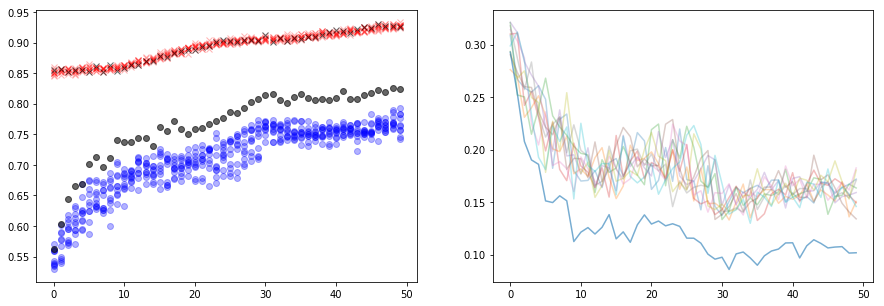

********************************


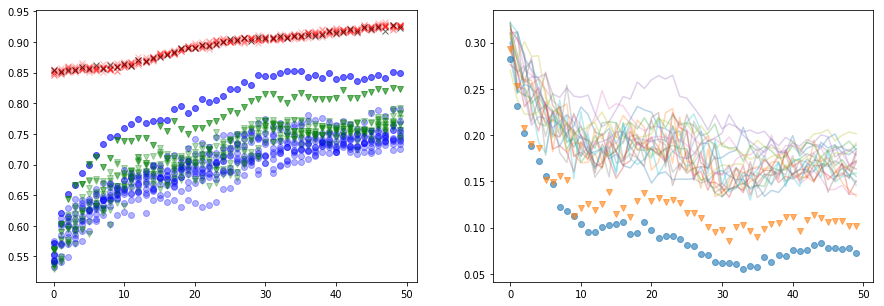

********************************


In [6]:
input_path = "results_emb_par_fit_test_no_commXy_N=50000_Epoch_N=1000_Nt=10_p=100_part_num=100_exp_num=10.csv"
ddd = pd.read_csv(input_path)
step_size = 100 # * 10 = Epoch_N
no_comm_1000_100 = af.analyze_run(input_path, beta_file_path, step_size, true_cols, comm=False)

input_path = "results_emb_par_fit_test_with_commXy_N=50000_Epoch_N=1000_Nt=10_p=100_part_num=100_exp_num=10.csv"
step_size = 100 # * 10 = Epoch_N
with_comm_1000_100 = af.analyze_run(input_path, beta_file_path, step_size, true_cols, comm = True)

no_comm_1000_100.make_like_path_plots()
with_comm_1000_100.make_like_path_plots()
no_comm_1000_100.make_var_path_plots()
with_comm_1000_100.make_var_path_plots()

af.plot_between_shard_var_param_i(params_A=no_comm_1000_100, params_B=with_comm_1000_100, param_i=1)
af.plot_between_shard_var_param_i(params_A=no_comm_1000_100, params_B=with_comm_1000_100, param_i=2)
af.plot_between_shard_var_param_i(params_A=no_comm_1000_100, params_B=with_comm_1000_100, param_i=3)
af.plot_between_shard_var_param_i(params_A=no_comm_1000_100, params_B=with_comm_1000_100, param_i=4)

no_comm_1000_100.likelihood_by_shard()
with_comm_1000_100.likelihood_by_shard()
no_comm_1000_100.avg_likelihood_by_shard()
with_comm_1000_100.avg_likelihood_by_shard()

no_comm_1000_100.make_like_path_plots_by_shard()
with_comm_1000_100.make_like_path_plots_by_shard()
af.make_like_path_plots_by_shard(no_comm_1000_100, with_comm_1000_100)

(51, 18)
number of time epochs =  50
number of predictors =  100
number of particles accorss allshards =  15000
(100, 15000)
len(f_Betas_in_columns) 50
len(f_Betas_in_columns[0]) 100
len(f_Betas_in_columns[0][0]) 15000
(51, 18)
number of time epochs =  50
number of predictors =  100
number of particles accorss allshards =  15000
(100, 15000)
len(f_Betas_in_columns) 50
len(f_Betas_in_columns[0]) 100
len(f_Betas_in_columns[0][0]) 15000


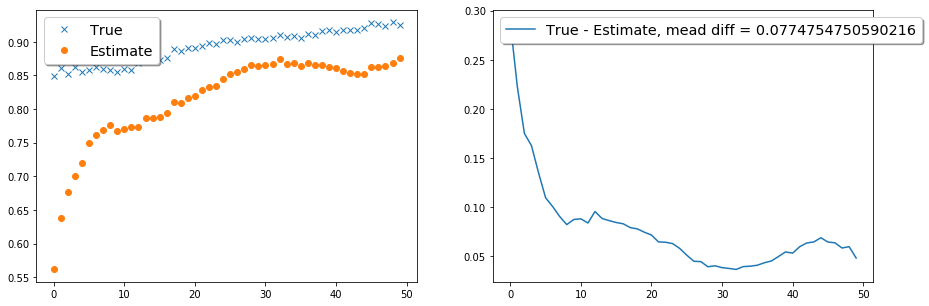

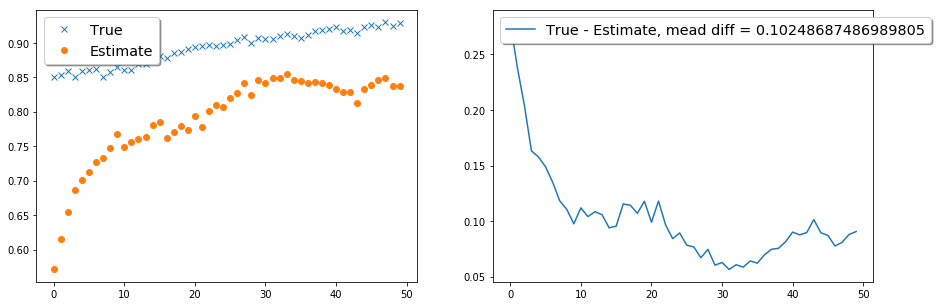

UPDATES ARE BEING ADDED
UPDATES ARE BEING ADDED


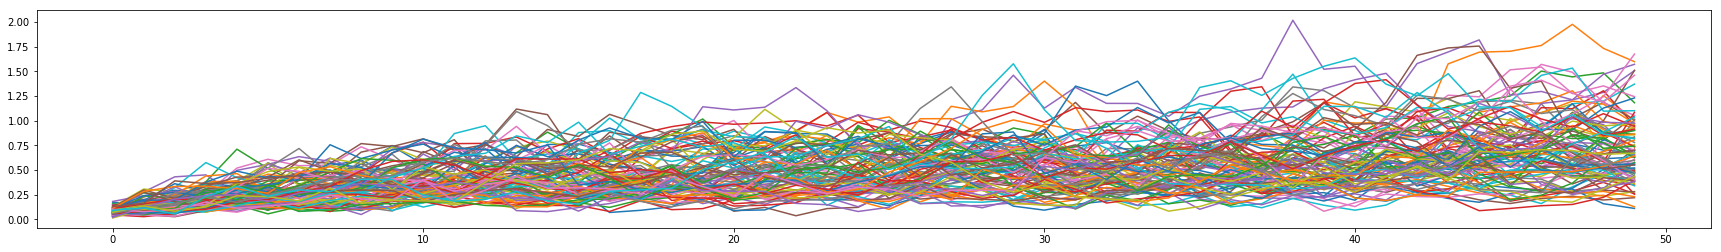

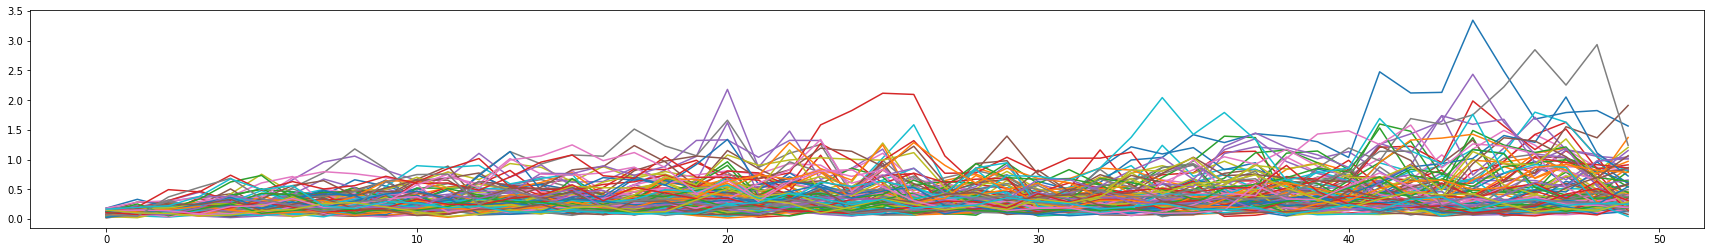

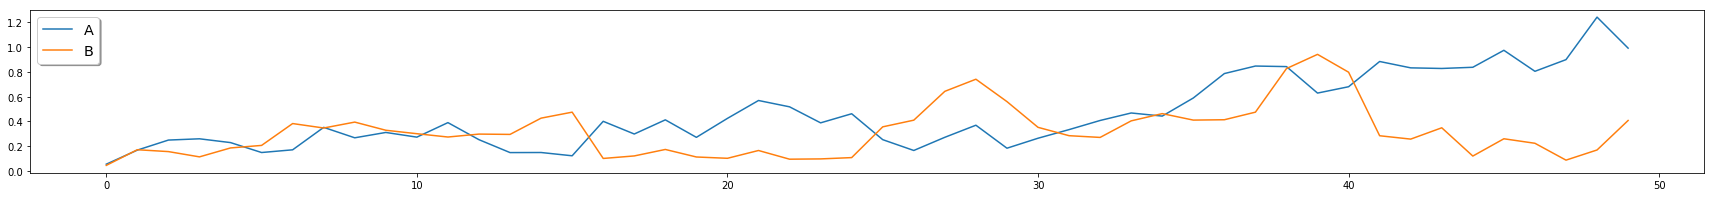

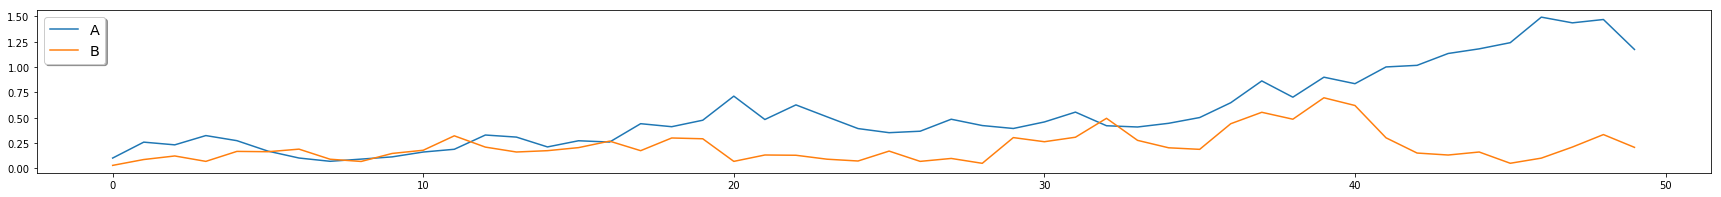

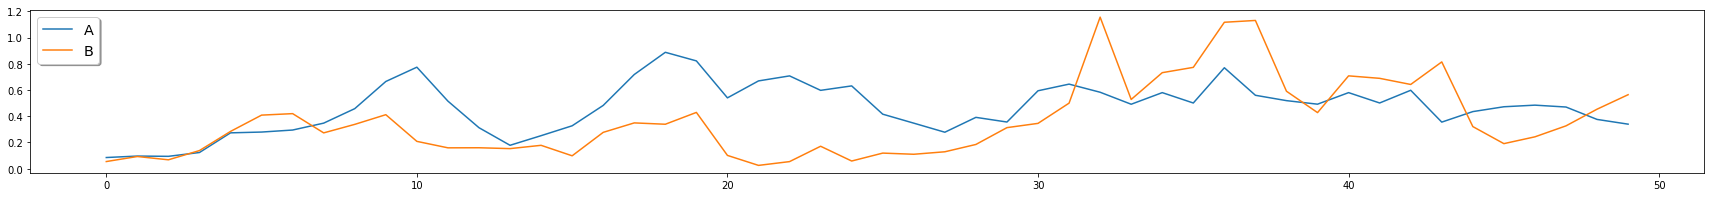

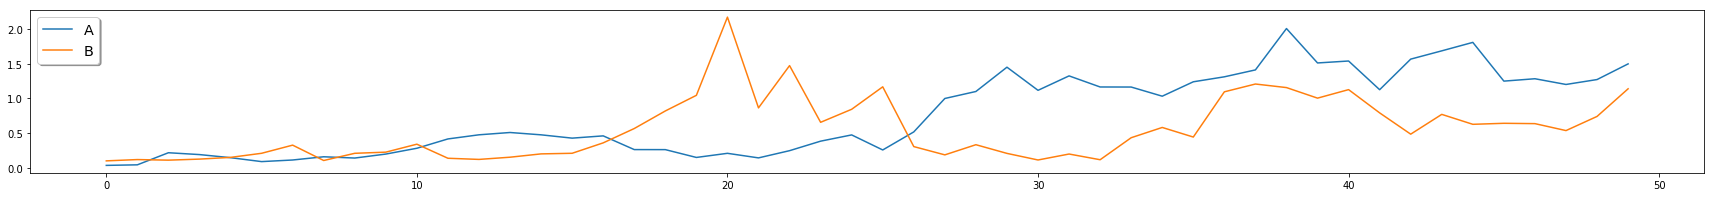

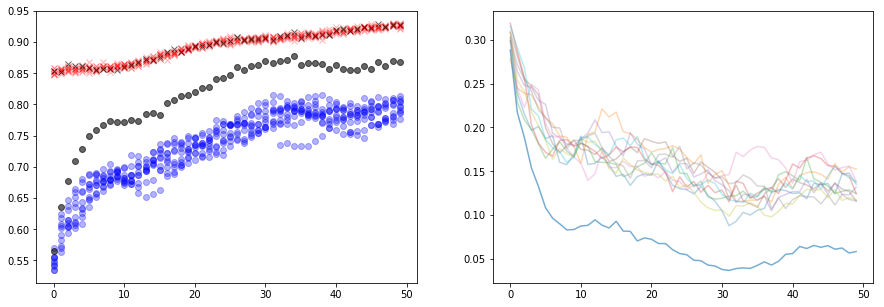

********************************


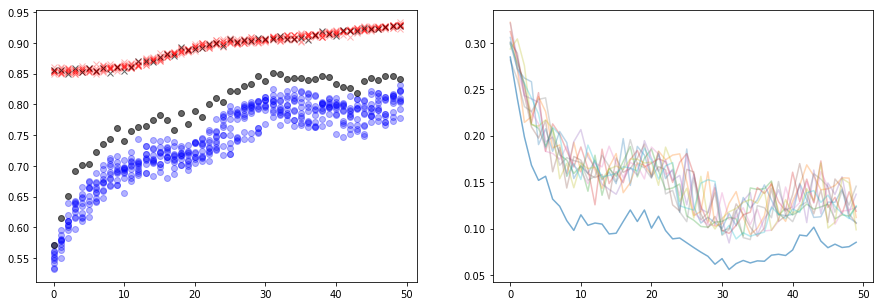

********************************


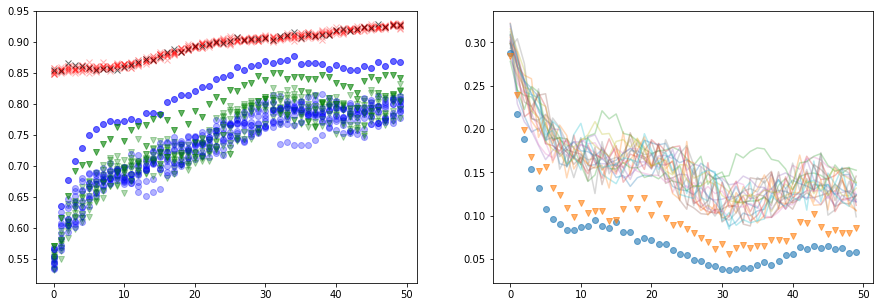

********************************


In [8]:
input_path = "results_emb_par_fit_test_no_commXy_N=50000_Epoch_N=1000_Nt=10_p=100_part_num=1500_exp_num=10.csv"
ddd = pd.read_csv(input_path)
step_size = 100 # * 10 = Epoch_N
no_comm_1000_1500 = af.analyze_run(input_path, beta_file_path, step_size, true_cols, comm=False)

input_path = "results_emb_par_fit_test_with_commXy_N=50000_Epoch_N=1000_Nt=10_p=100_part_num=1500_exp_num=10.csv"
step_size = 100 # * 10 = Epoch_N
with_comm_1000_1500 = af.analyze_run(input_path, beta_file_path, step_size, true_cols, comm = True)

no_comm_1000_1500.make_like_path_plots()
with_comm_1000_1500.make_like_path_plots()
no_comm_1000_1500.make_var_path_plots()
with_comm_1000_1500.make_var_path_plots()

af.plot_between_shard_var_param_i(params_A=no_comm_1000_1500, params_B=with_comm_1000_1500, param_i=1)
af.plot_between_shard_var_param_i(params_A=no_comm_1000_1500, params_B=with_comm_1000_1500, param_i=2)
af.plot_between_shard_var_param_i(params_A=no_comm_1000_1500, params_B=with_comm_1000_1500, param_i=3)
af.plot_between_shard_var_param_i(params_A=no_comm_1000_1500, params_B=with_comm_1000_1500, param_i=4)

no_comm_1000_1500.likelihood_by_shard()
with_comm_1000_1500.likelihood_by_shard()
no_comm_1000_1500.avg_likelihood_by_shard()
with_comm_1000_1500.avg_likelihood_by_shard()

no_comm_1000_1500.make_like_path_plots_by_shard()
with_comm_1000_1500.make_like_path_plots_by_shard()
af.make_like_path_plots_by_shard(no_comm_1000_1500, with_comm_1000_1500)

In [9]:
import numpy as np

In [10]:
np.nansum([np.nan, 1])

1.0

In [11]:
np.exp(-100)

3.720075976020836e-44

In [12]:
def make_like_diff_plot_comparisons(tuple_list, colors, particle_count): # no_comm, with_comm):
        # tuple_list should come in as a list of touples with first element in touple being no_comm and the 
        # second element in the touple should be with_comm
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
        
        for expr in range(len(tuple_list)):
        
            axes[0].plot(tuple_list[expr][0].avg_true_shard_likelihoods, '-', alpha=.6, label="True", color='black')
            axes[0].plot(tuple_list[expr][0].avg_est_shard_likelihoods, '+', alpha=.6, label=particle_count[expr] + ":No Comm", color=colors[expr])
            
            axes[0].plot(tuple_list[expr][1].avg_est_shard_likelihoods, 'v', alpha=.6, label=particle_count[expr] + ":With Comm", color=colors[expr])
            
            legend = axes[0].legend(loc='lower right', shadow=True, fontsize='medium')
            
            diff_no_comm = np.subtract(tuple_list[expr][0].avg_true_shard_likelihoods, tuple_list[expr][0].avg_est_shard_likelihoods)
            
            diff_with_comm = np.subtract(
                tuple_list[expr][1].avg_true_shard_likelihoods, 
                tuple_list[expr][1].avg_est_shard_likelihoods
            )
            axes[1].plot( 
                diff_with_comm-diff_no_comm , 
                '-', 
                alpha=.6, 
                label= particle_count[expr] + ":no comm - with comm, mead diff = " + str(np.mean(diff_with_comm-diff_no_comm)),
                color=colors[expr]
            )
            legend = axes[1].legend(loc='lower right', shadow=True, fontsize='medium')
        plt.show()
        print("********************************")

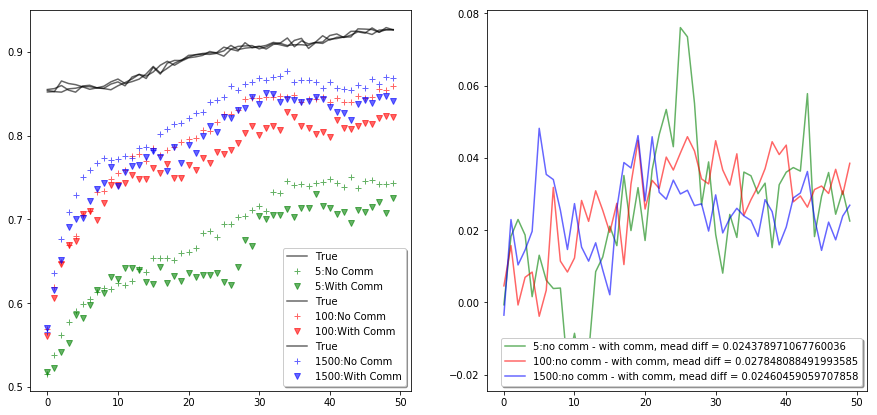

********************************


In [13]:
results_tuple_list = [
    (no_comm_1000_5, with_comm_1000_5),
    (no_comm_1000_100, with_comm_1000_100),
    (no_comm_1000_1500, with_comm_1000_1500)
]
res_colors=['g','r','b']
res_markers=['o','v','+']
particle_number=['5','100','1500']
make_like_diff_plot_comparisons(tuple_list=results_tuple_list, colors=res_colors, particle_count = particle_number)

In [14]:
type(no_comm_1000_5)

analysis_functions.analyze_run

(100, 50)


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


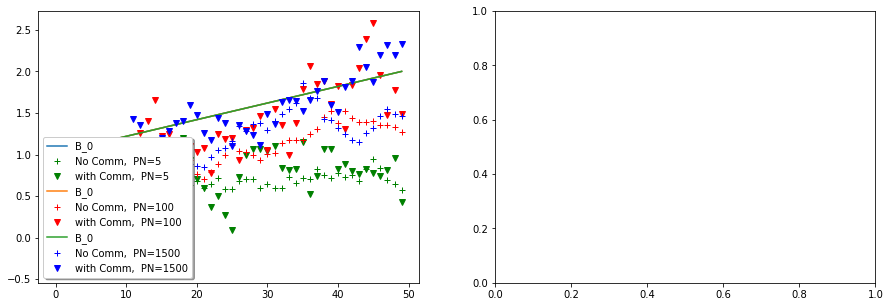

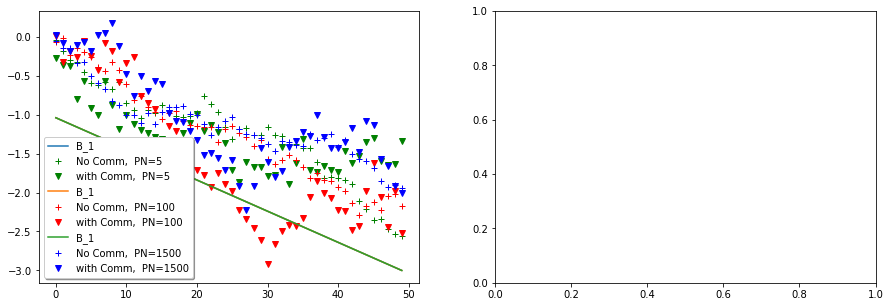

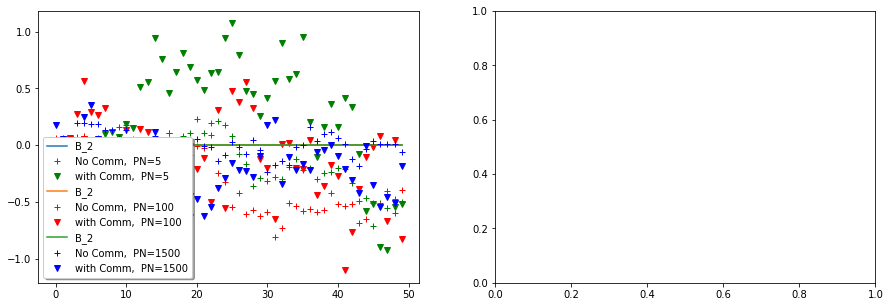

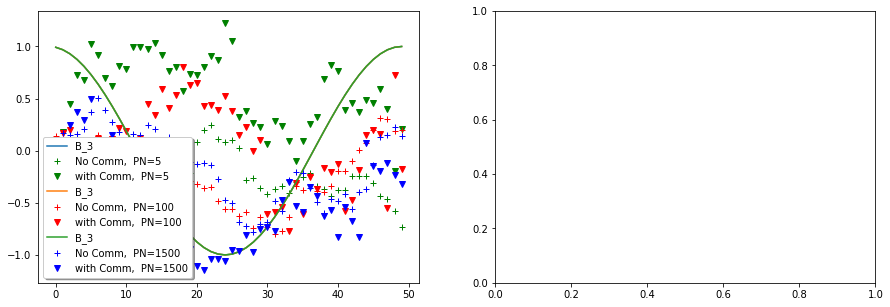

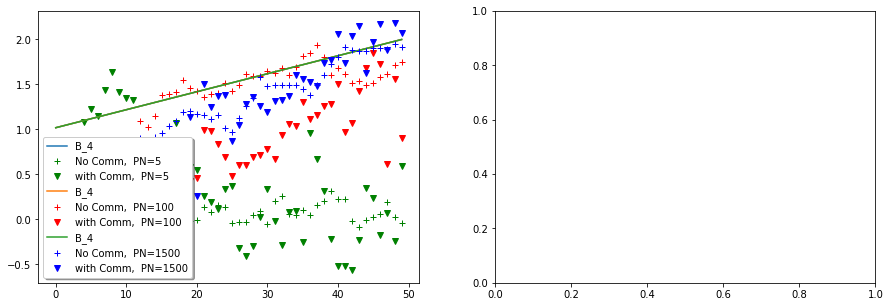

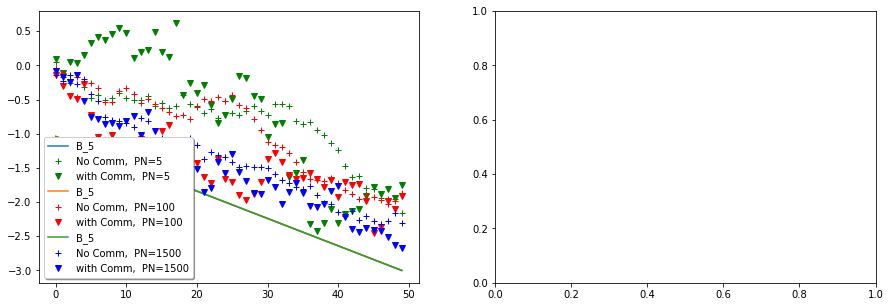

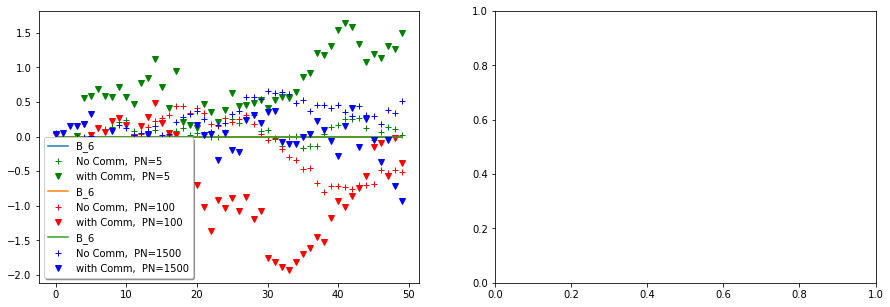

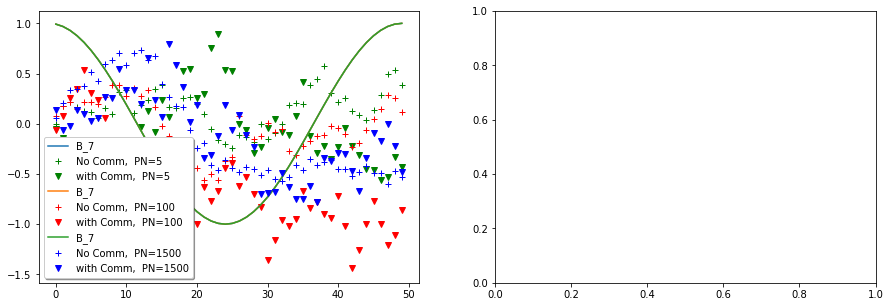

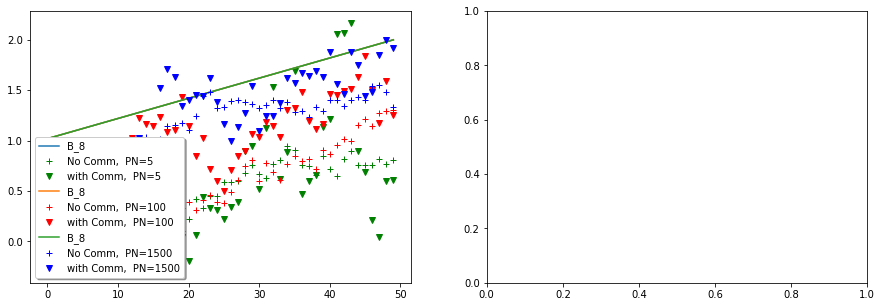

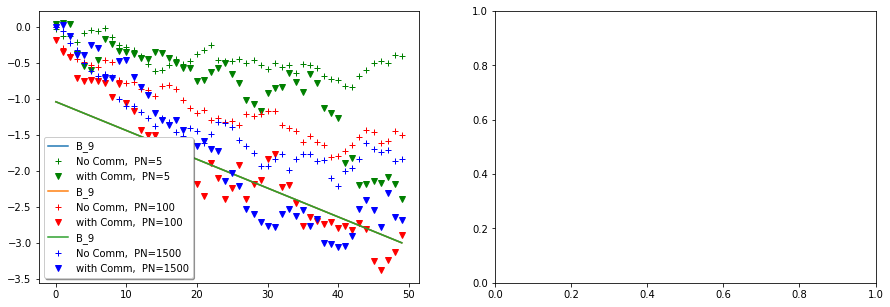

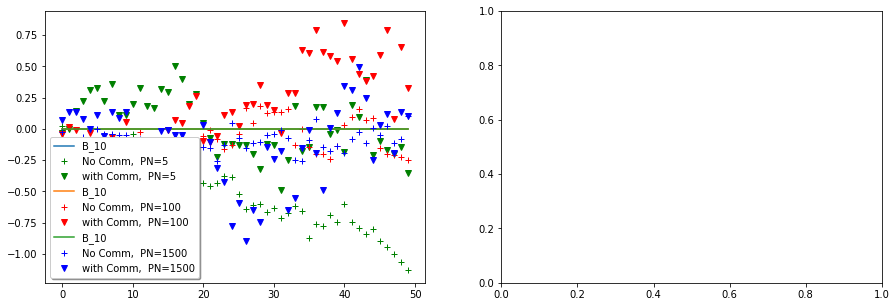

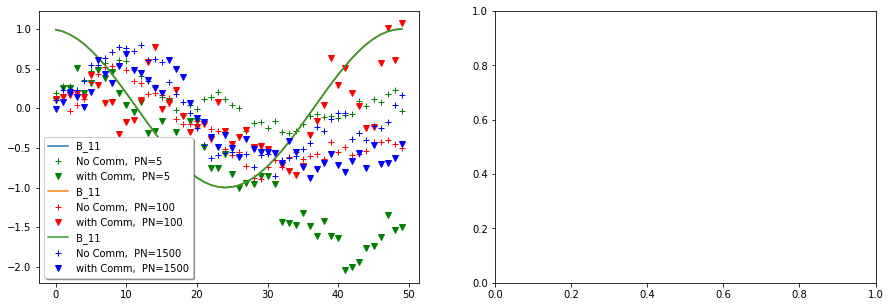

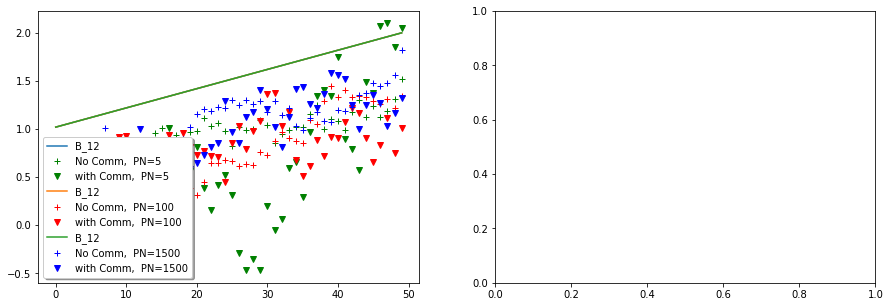

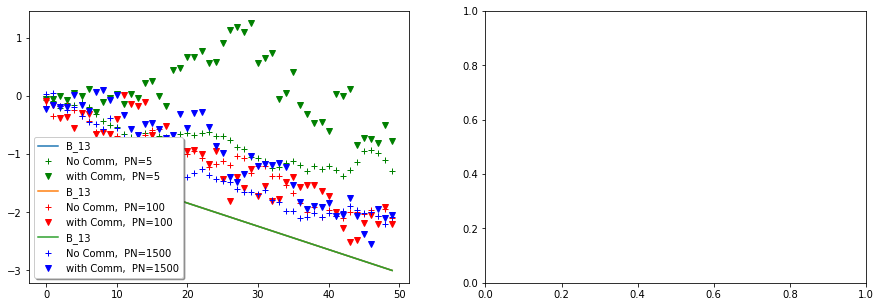

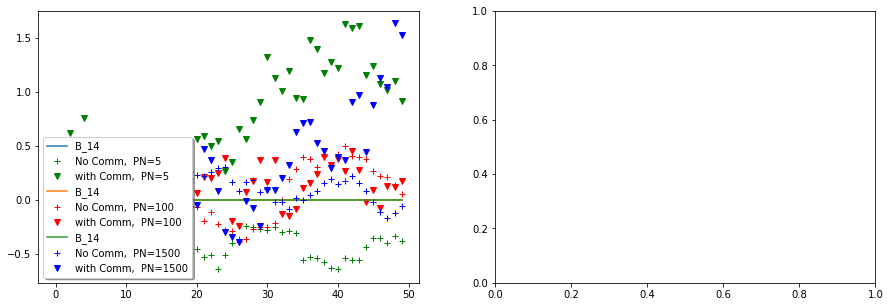

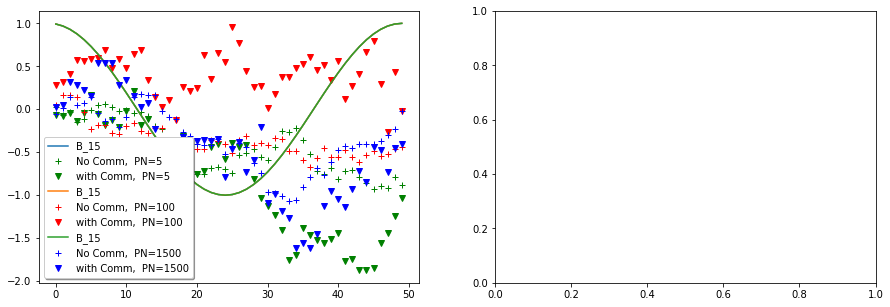

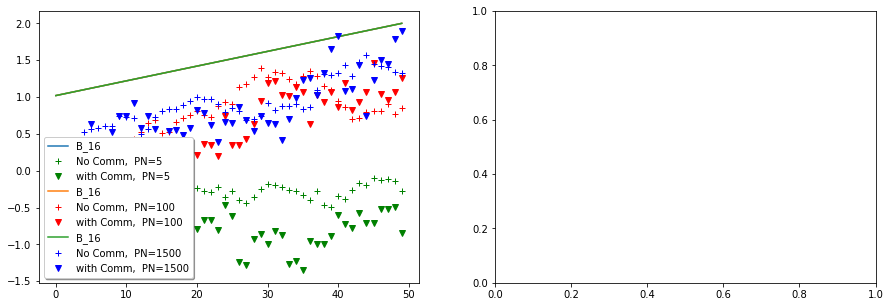

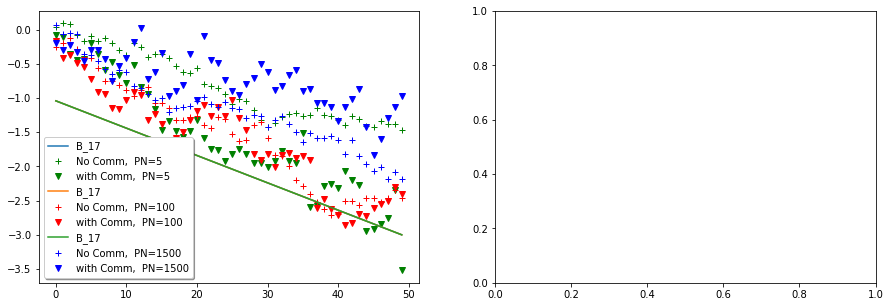

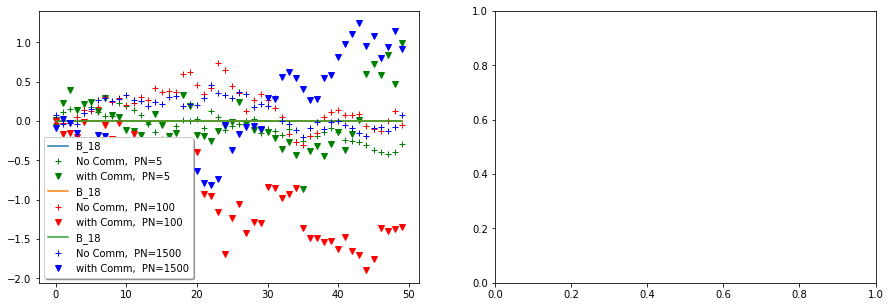

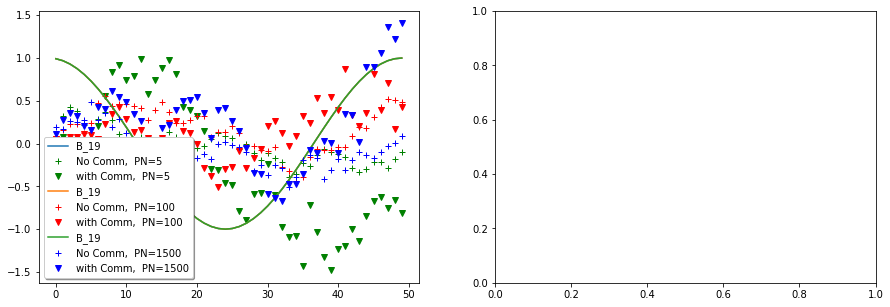

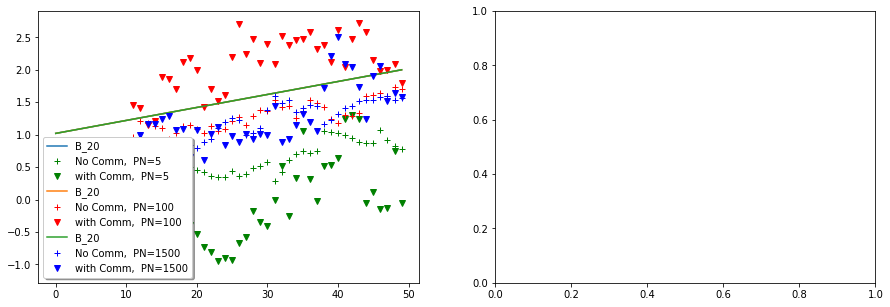

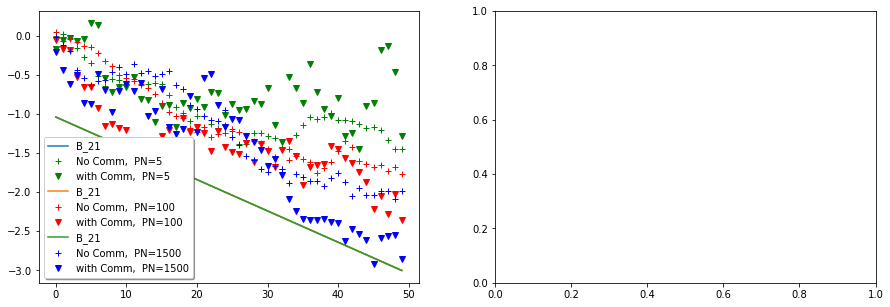

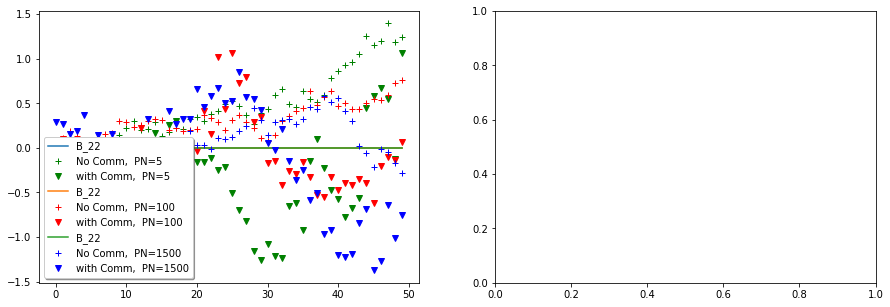

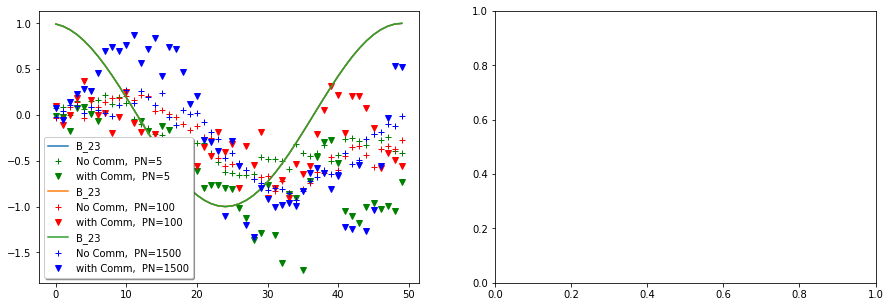

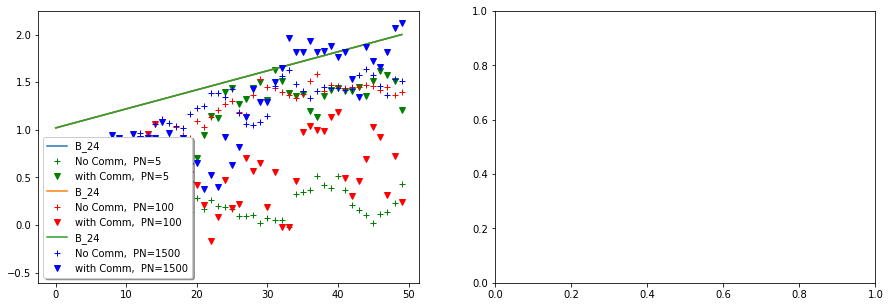

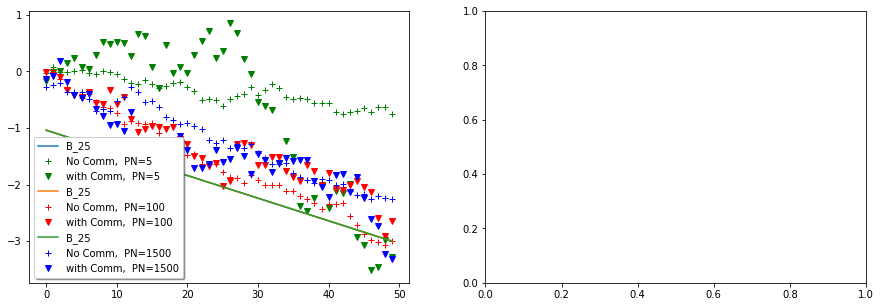

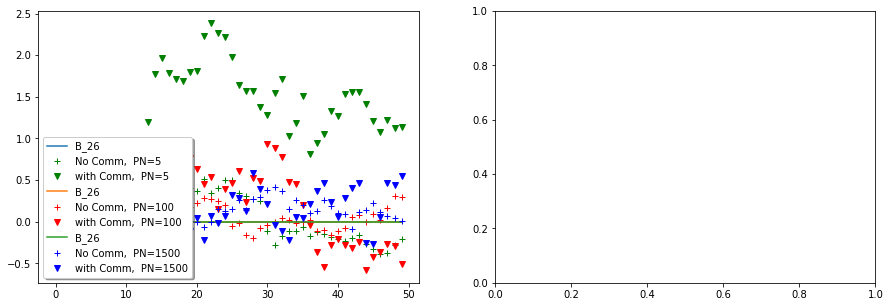

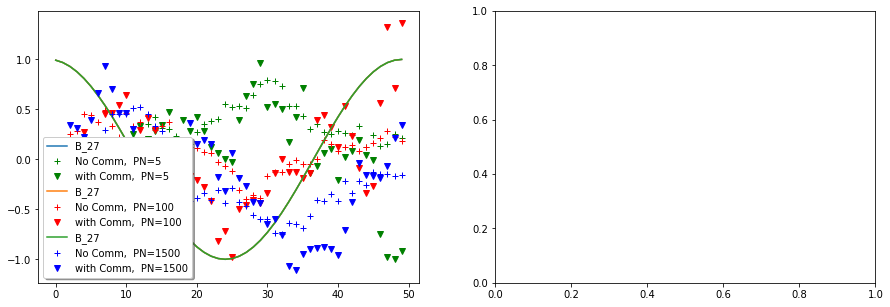

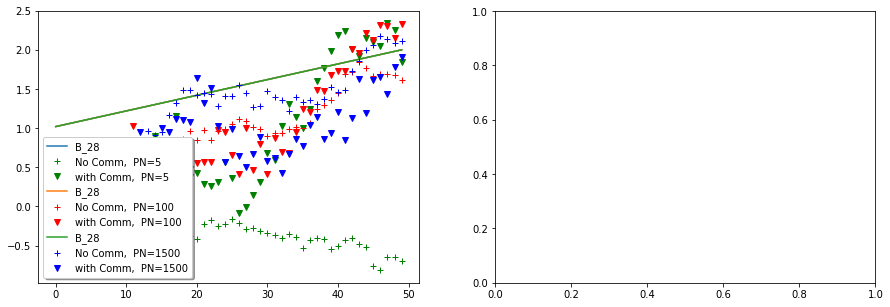

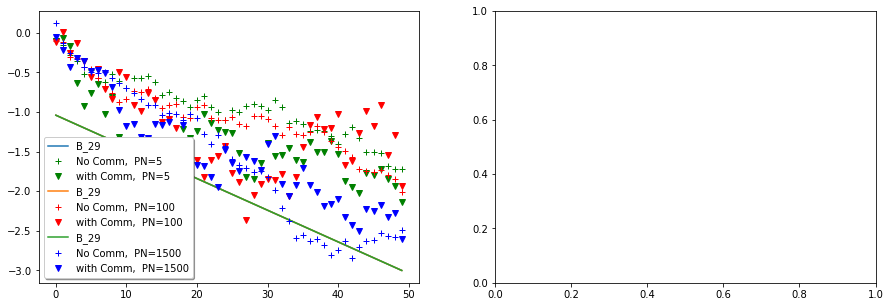

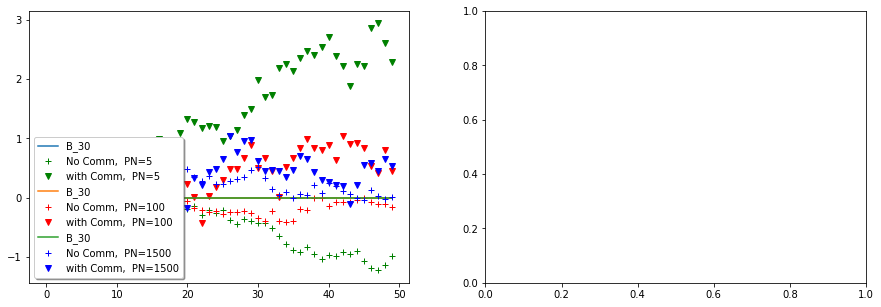

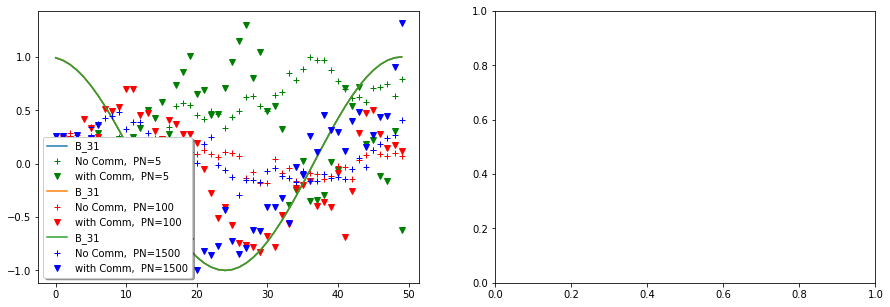

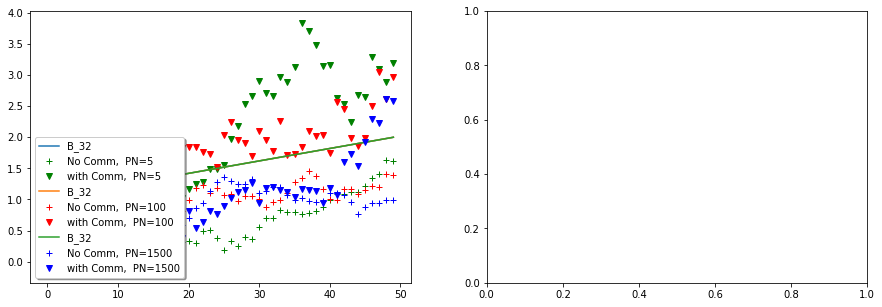

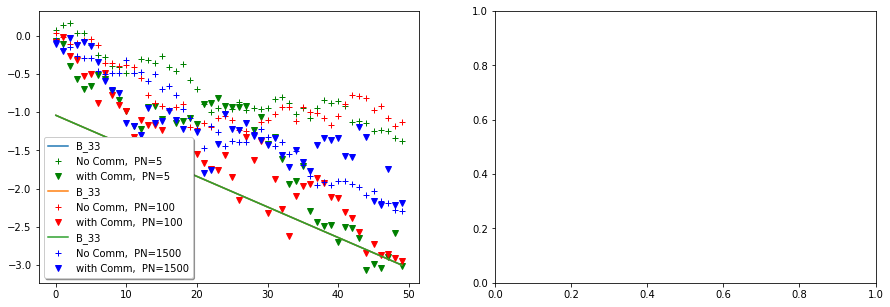

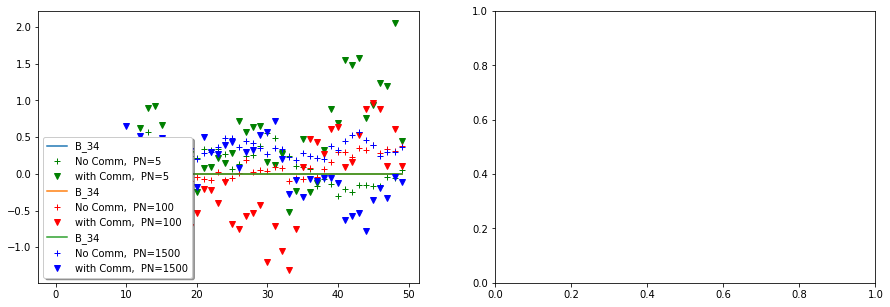

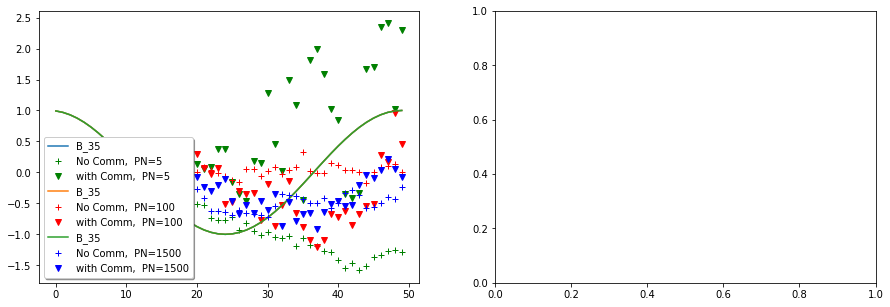

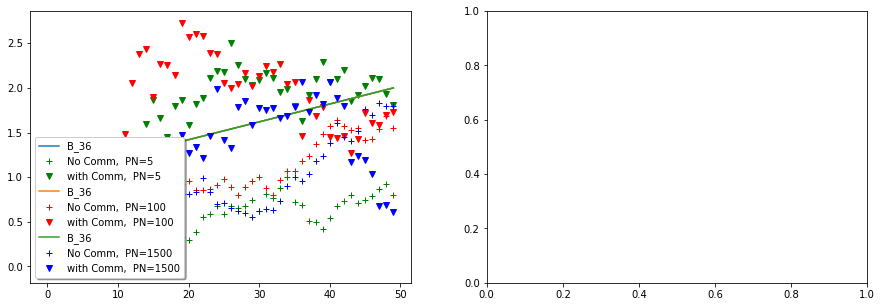

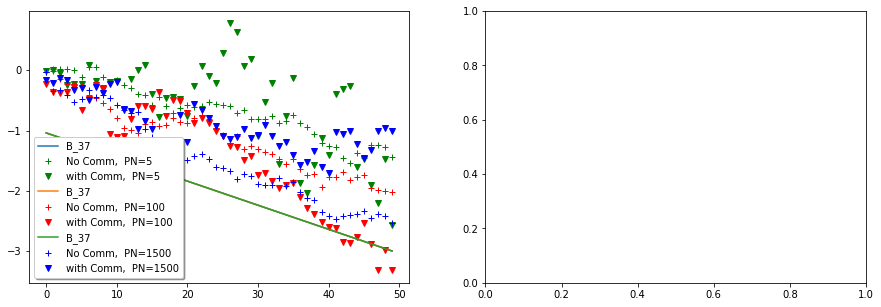

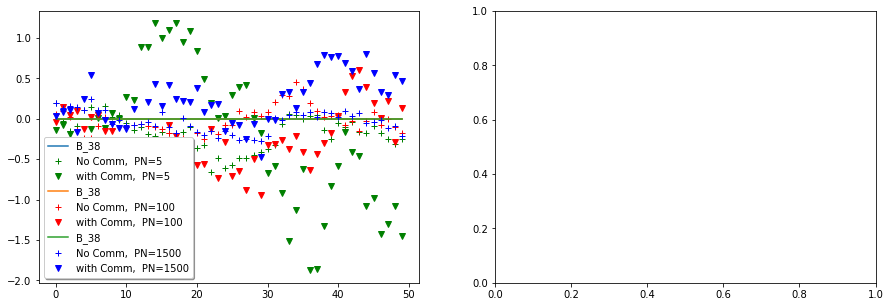

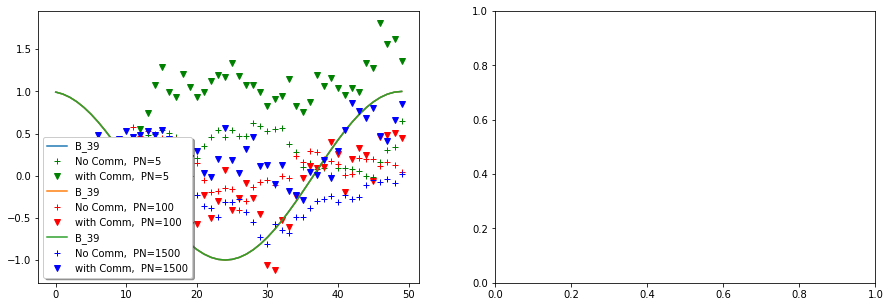

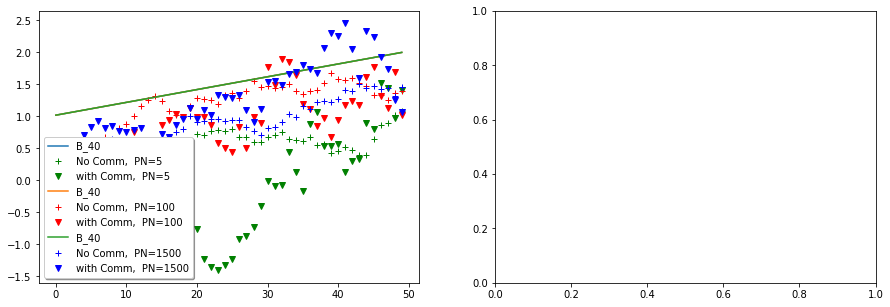

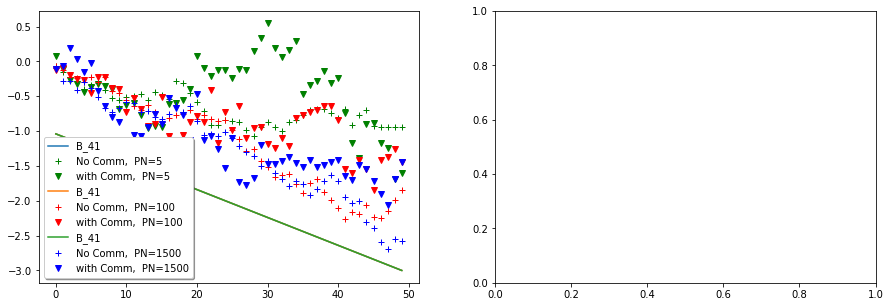

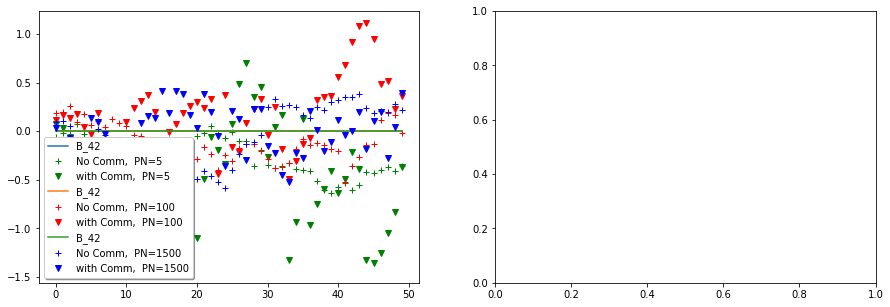

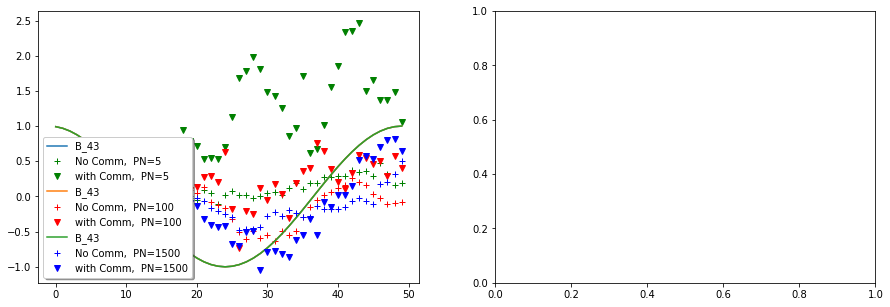

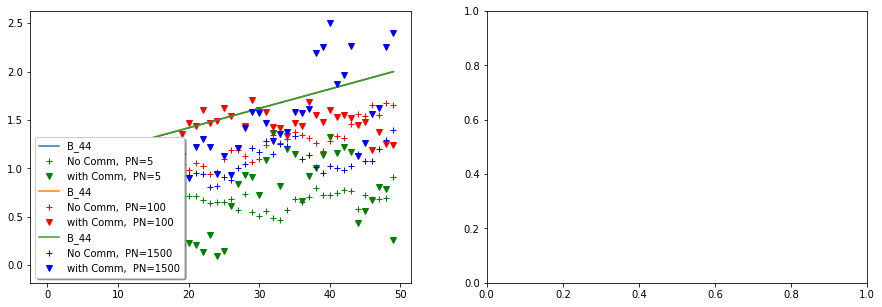

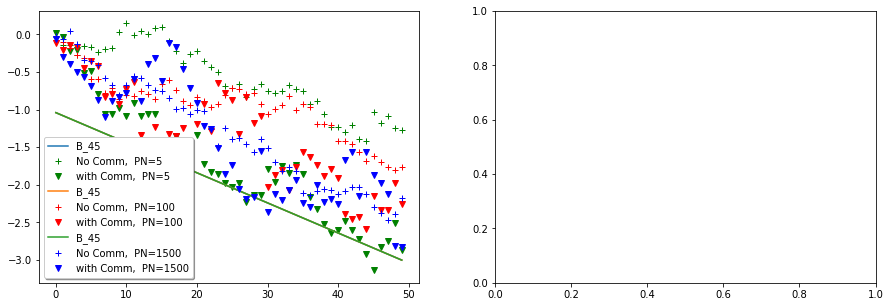

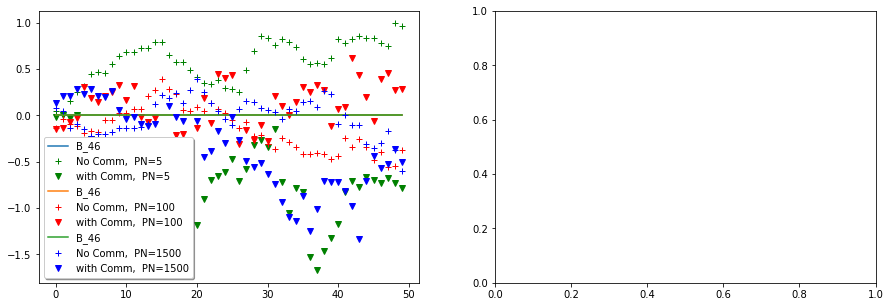

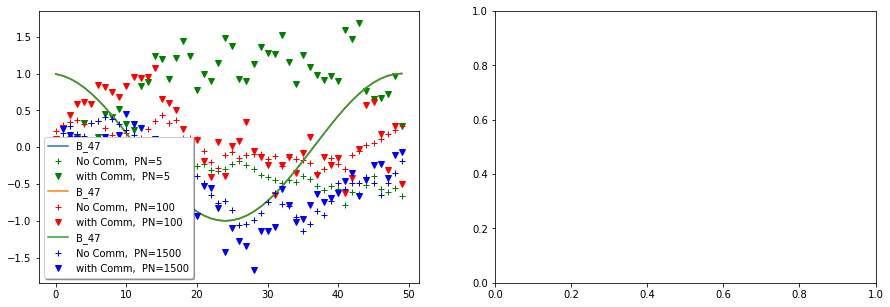

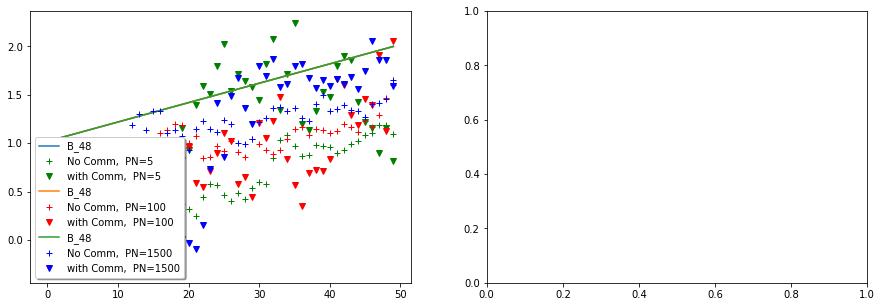

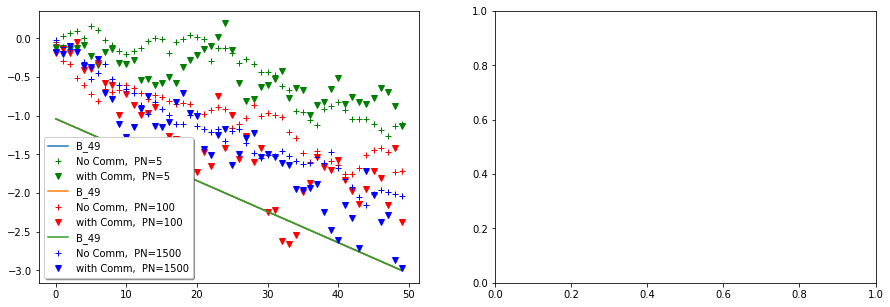

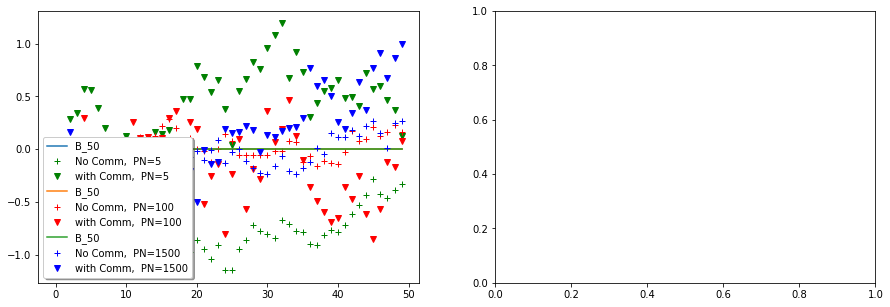

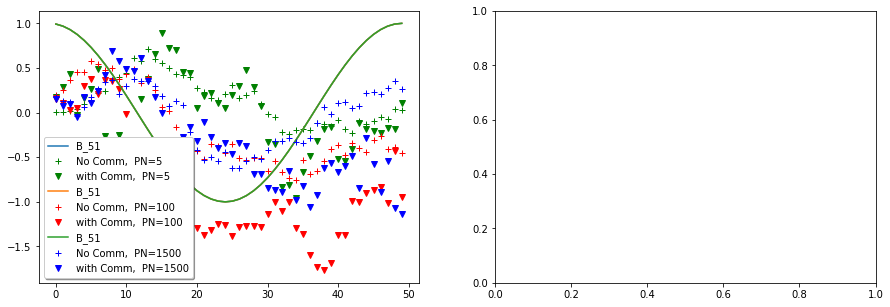

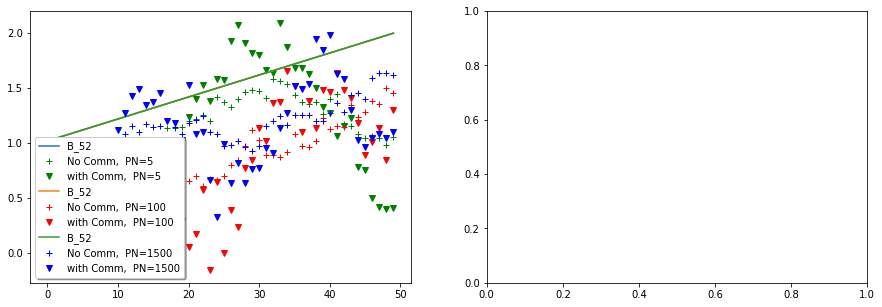

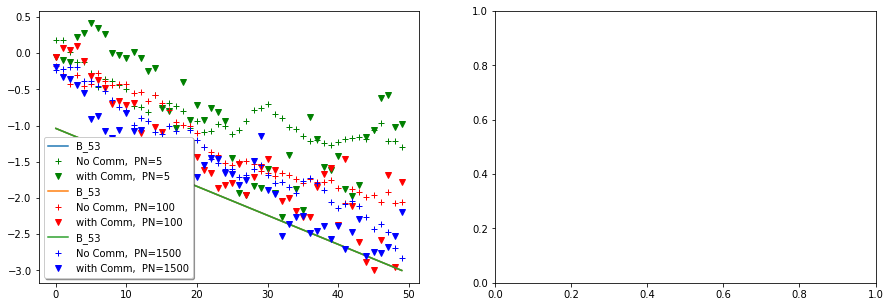

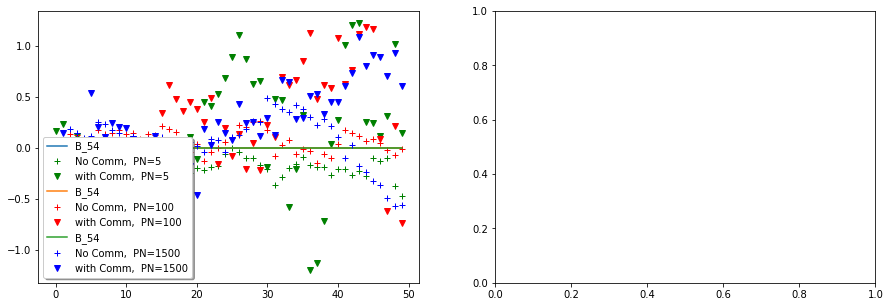

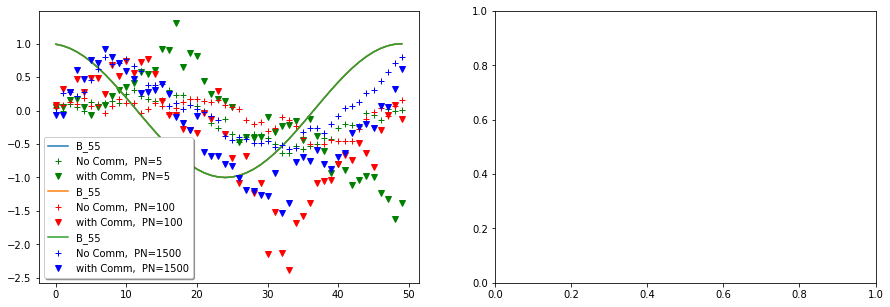

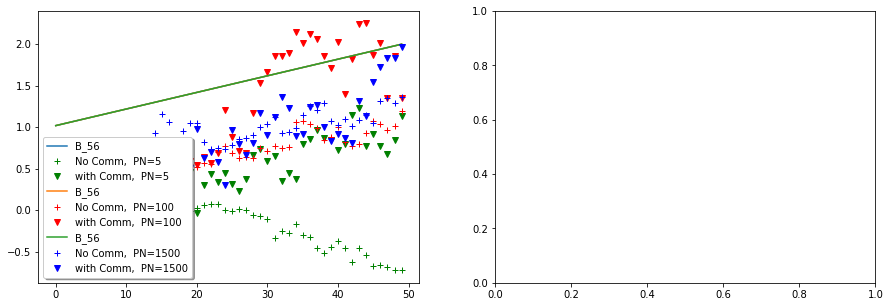

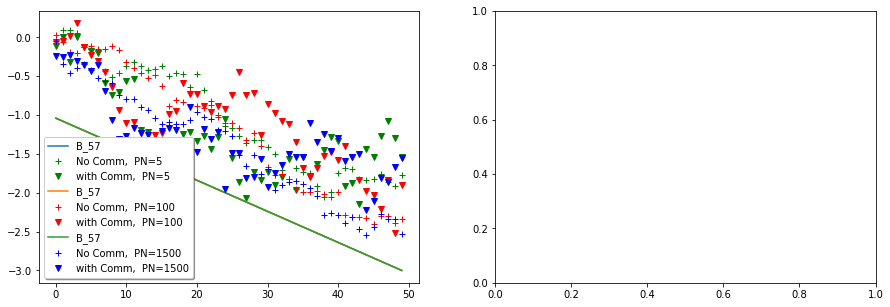

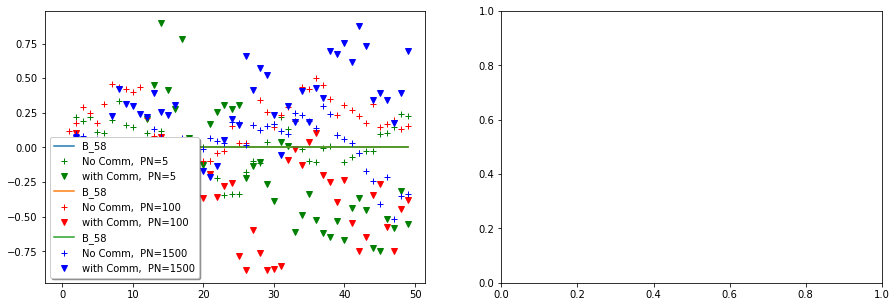

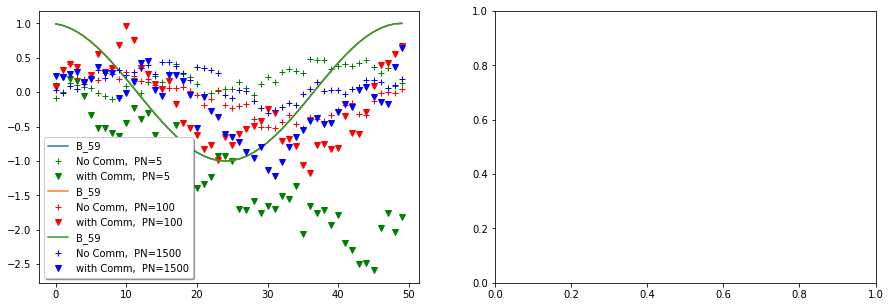

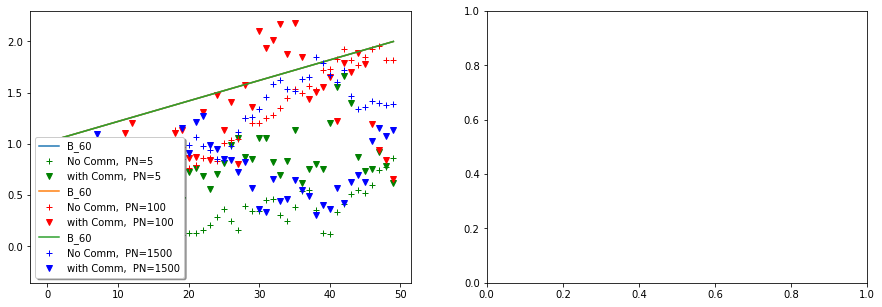

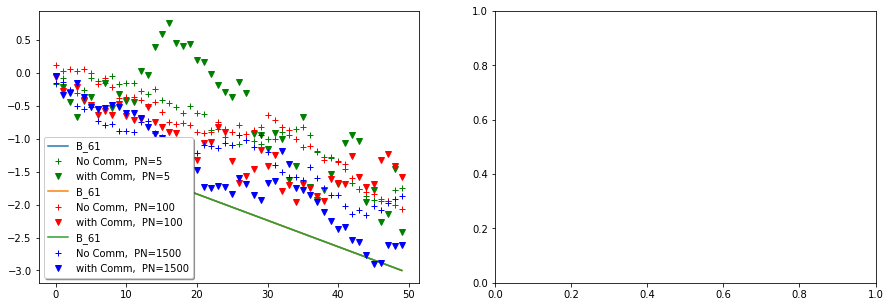

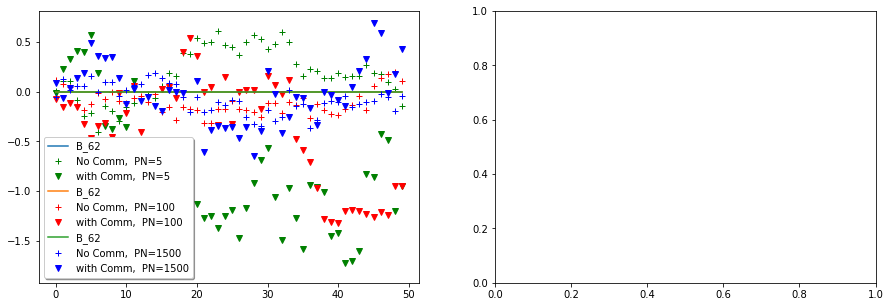

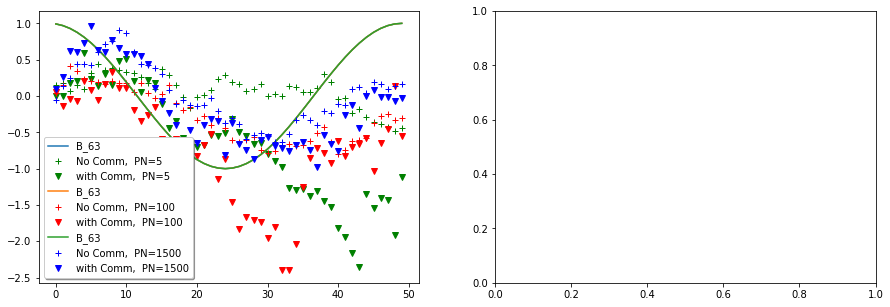

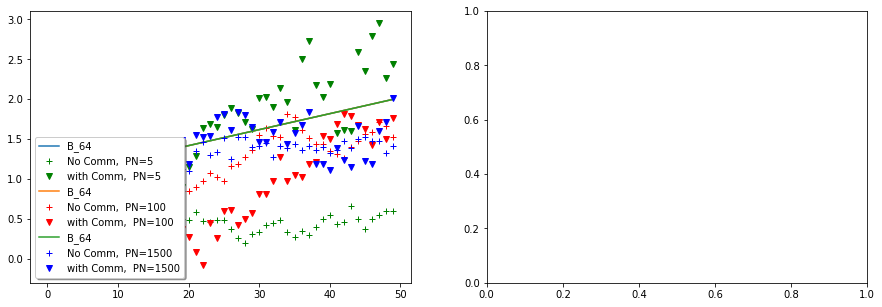

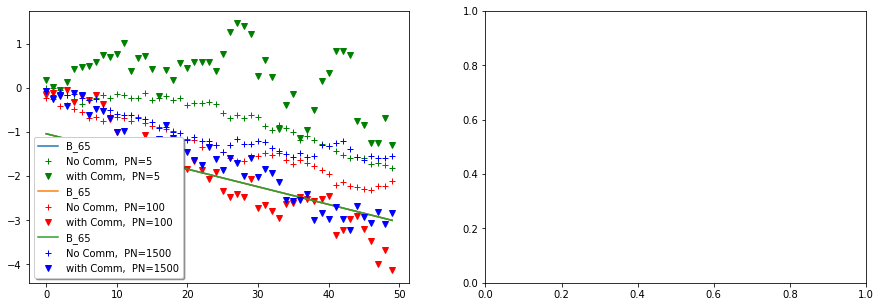

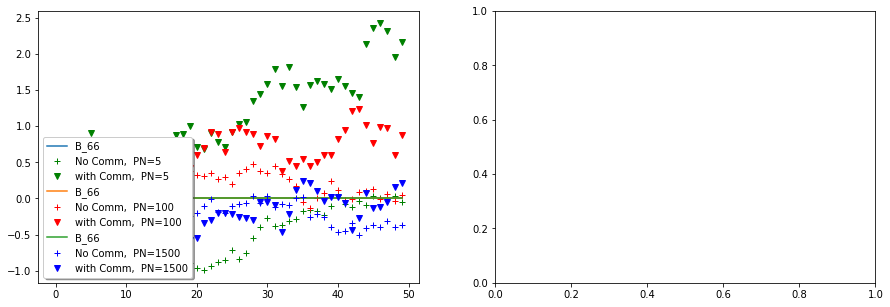

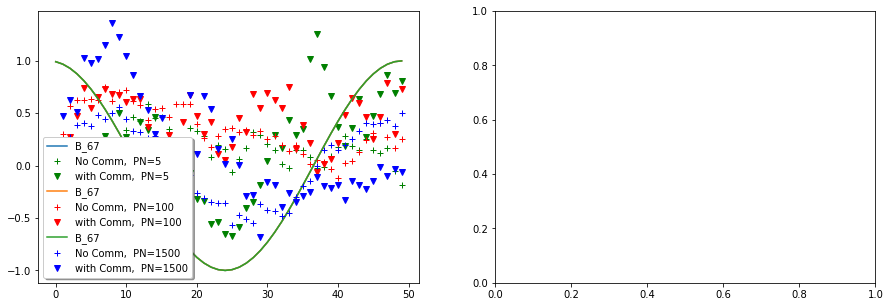

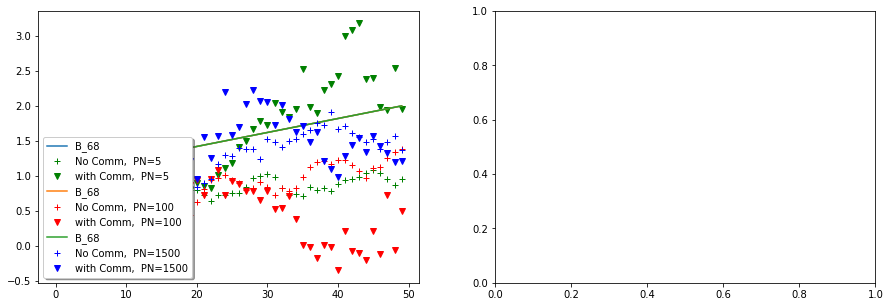

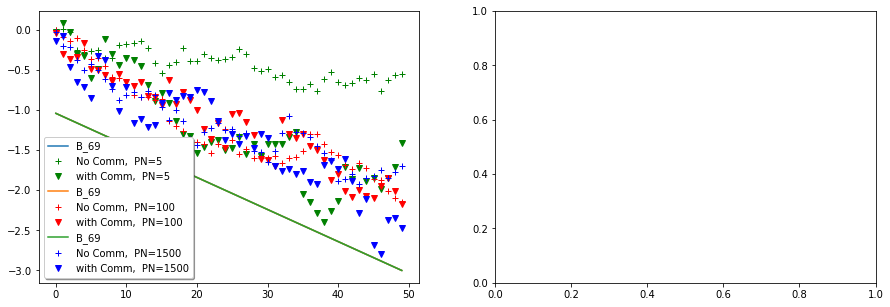

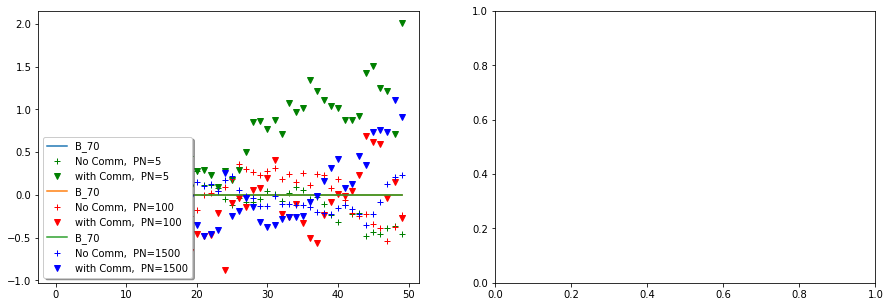

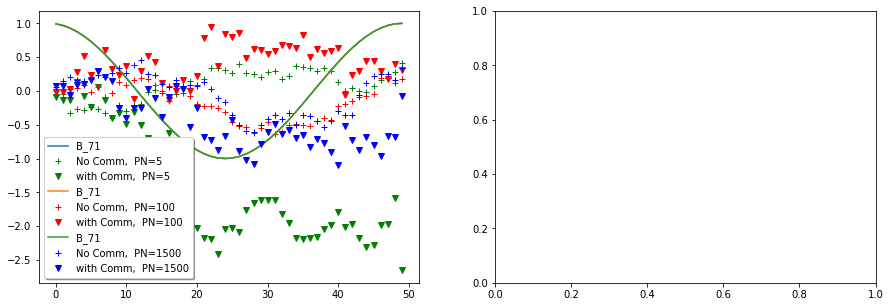

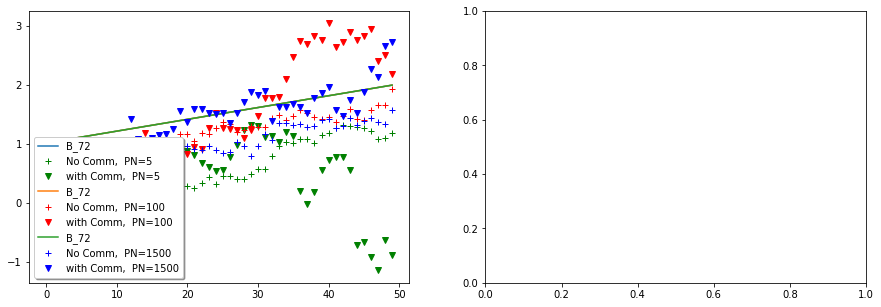

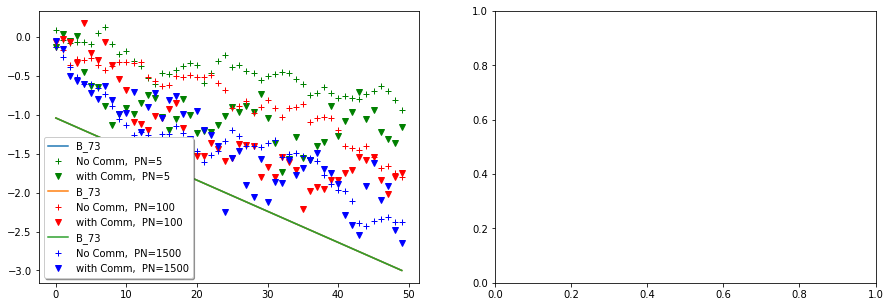

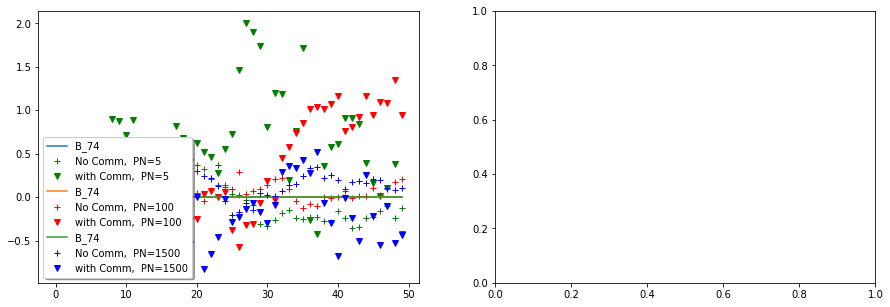

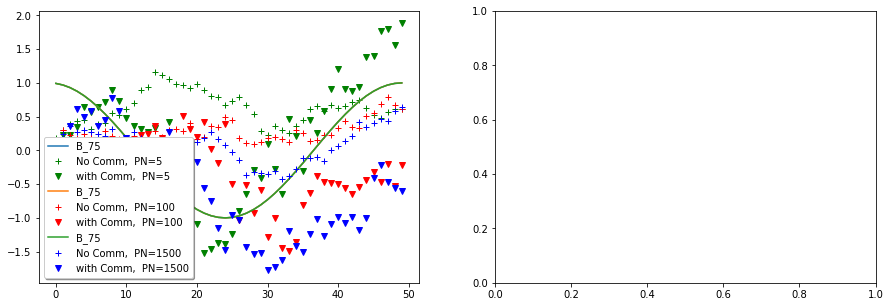

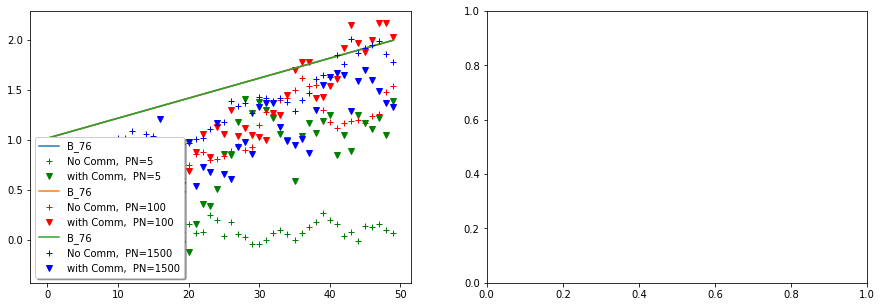

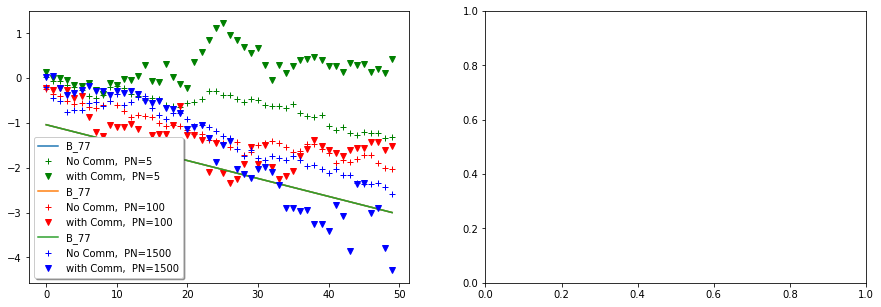

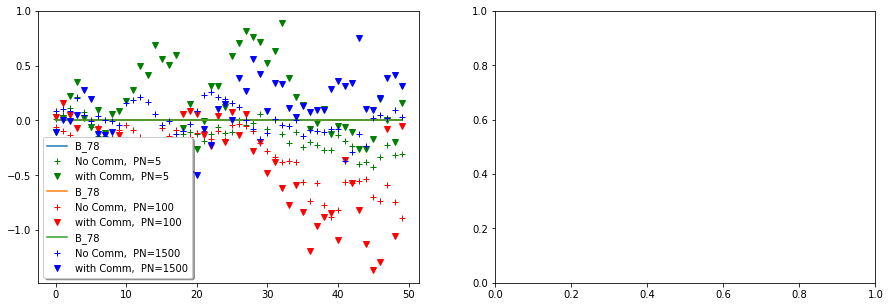

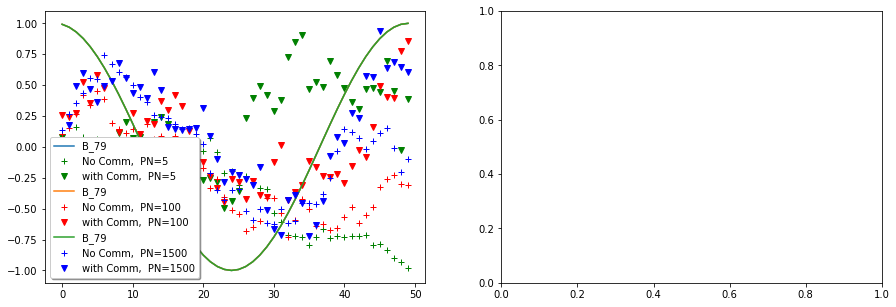

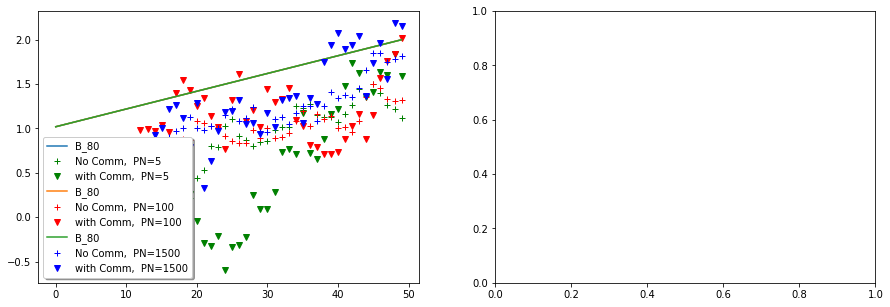

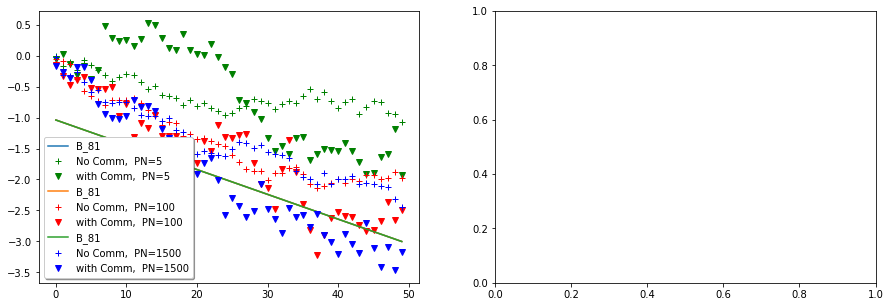

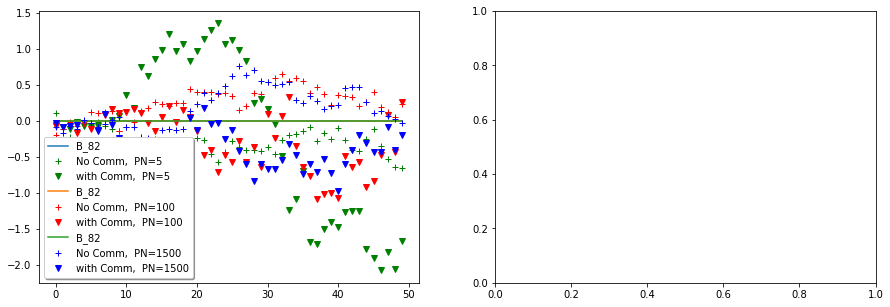

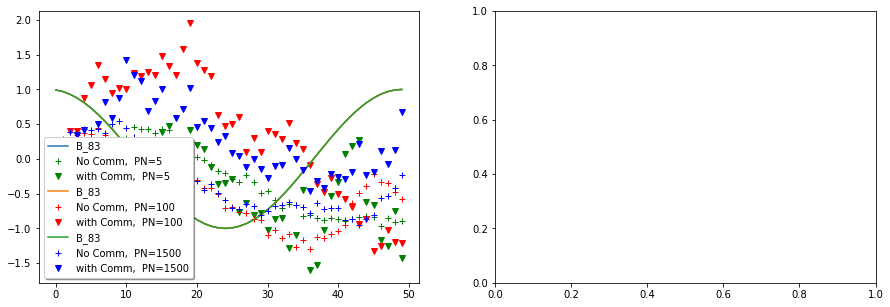

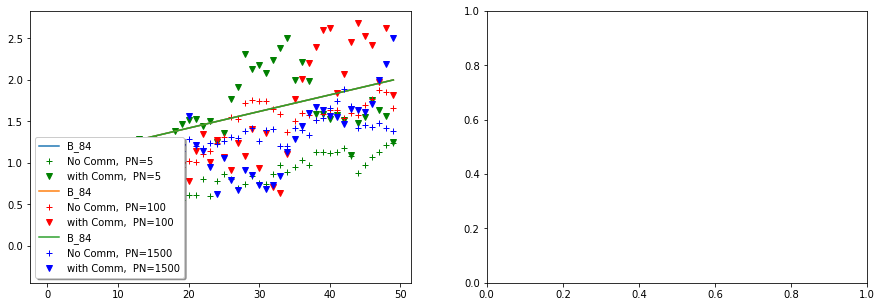

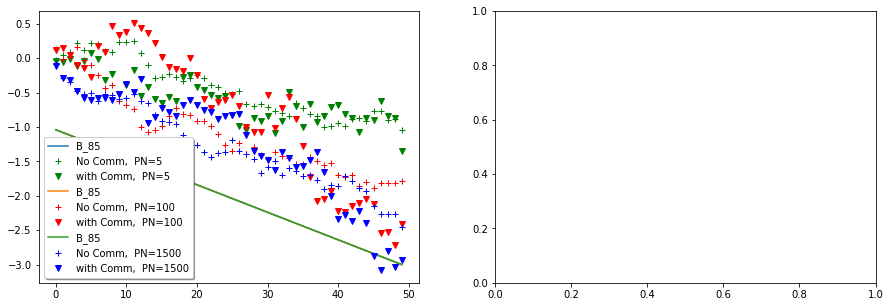

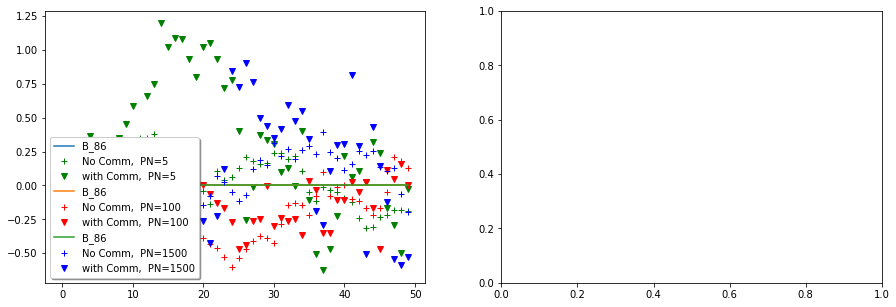

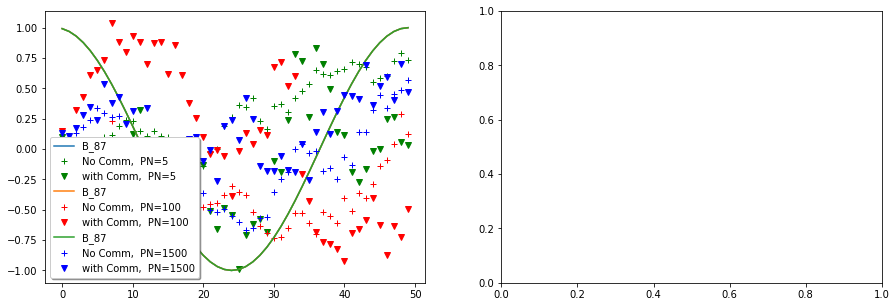

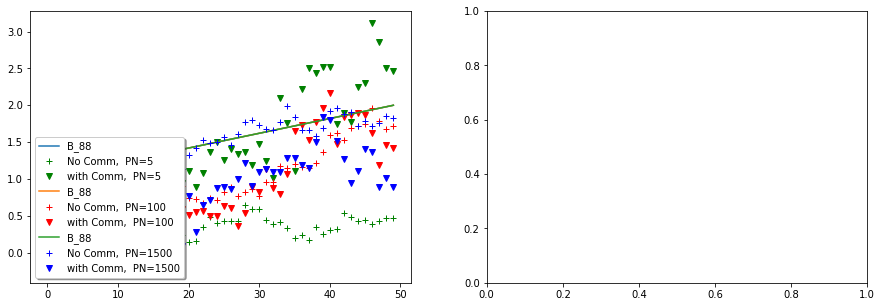

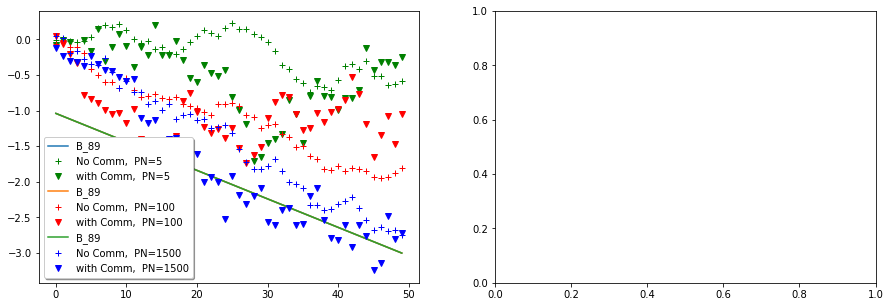

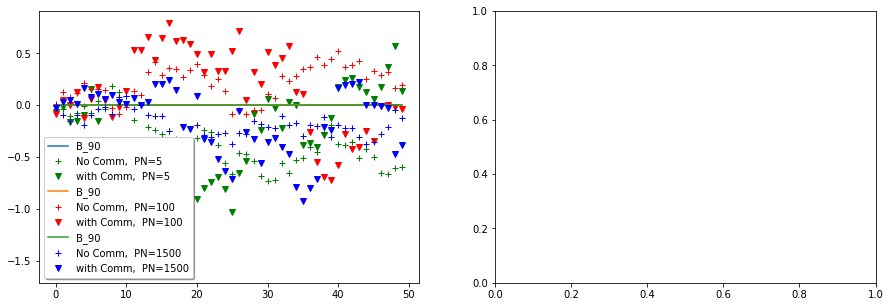

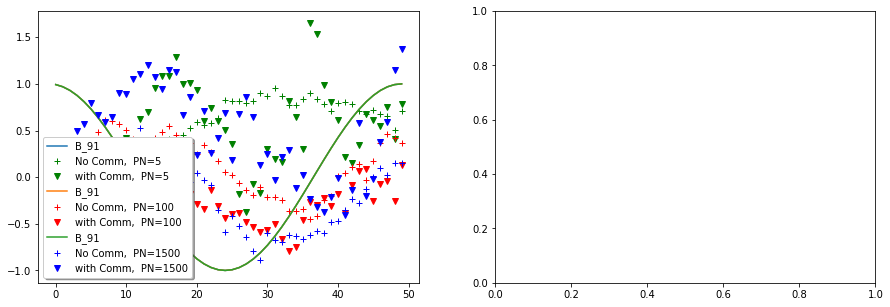

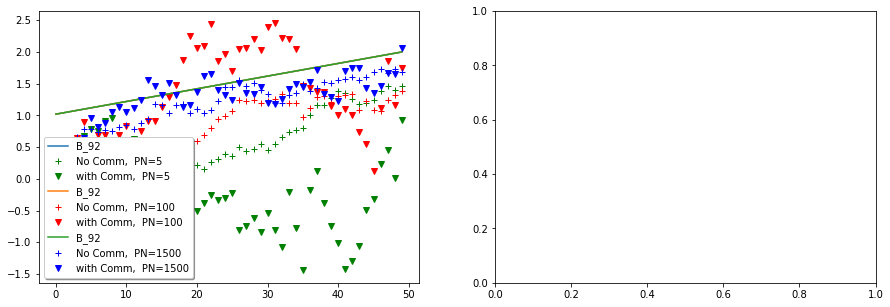

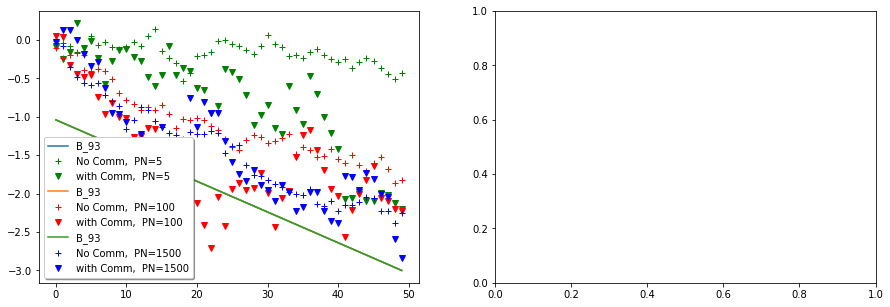

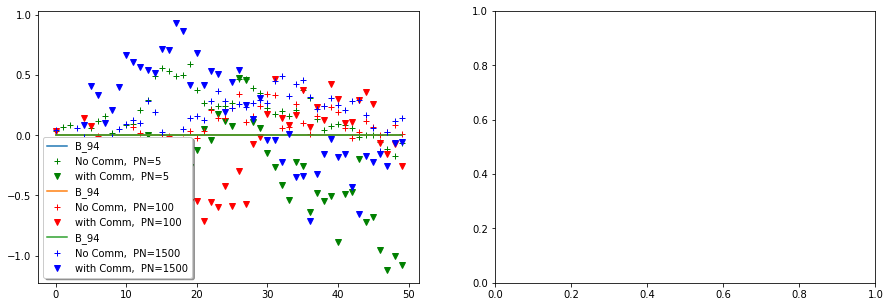

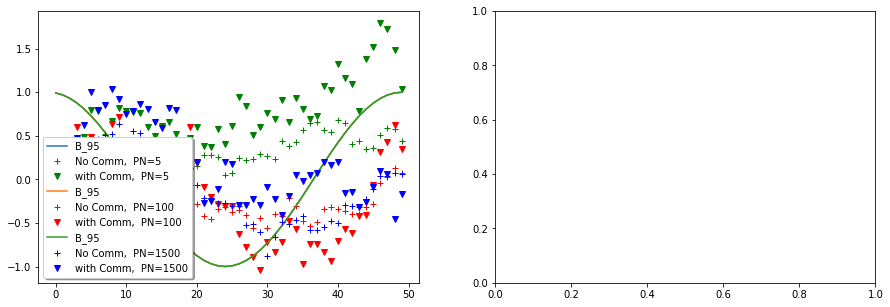

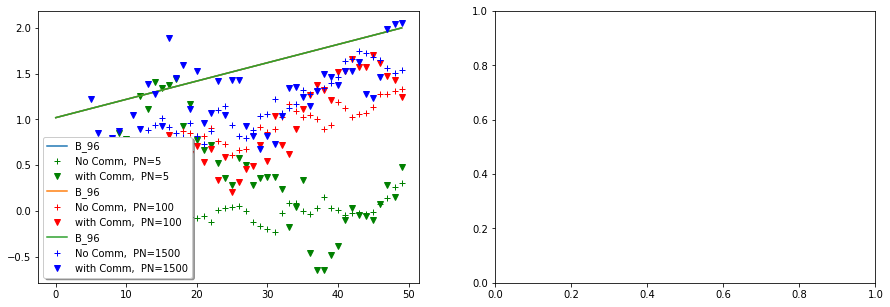

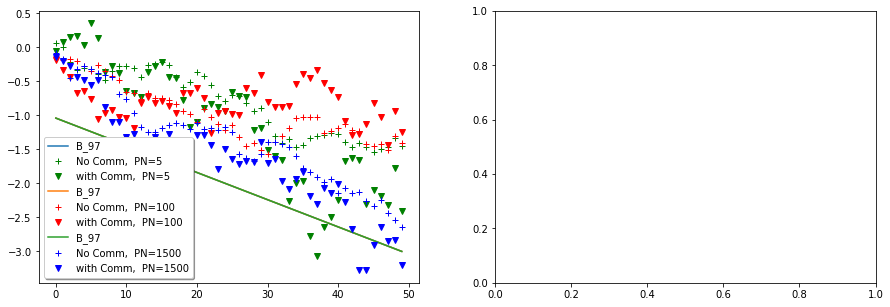

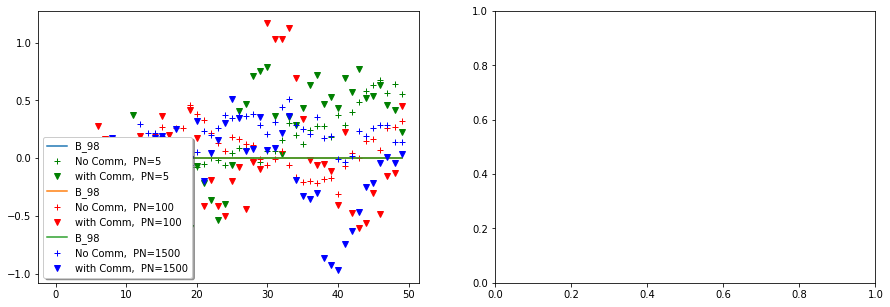

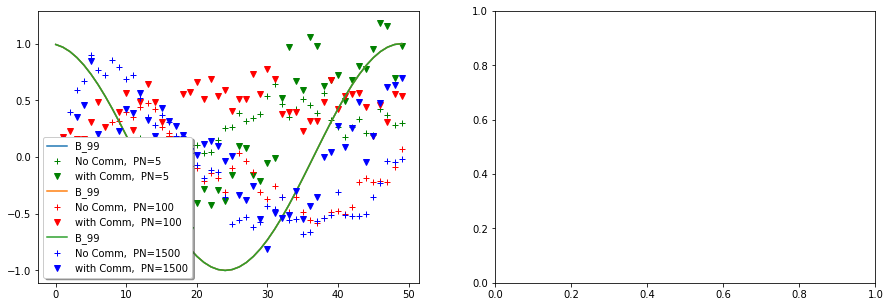

In [15]:
print(no_comm_1000_5.beta_i_avg.shape)
no_comm_1000_5.Beta_com

param_i = 7
comm_j = 0

res_colors=['g','r','b']
res_markers=['o','v','+']
particle_number=['5','100','1500']

for i in range(results_tuple_list[0][0].beta_i_avg.shape[0]):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    for tli in range(len(results_tuple_list)):
        axes[0].plot(results_tuple_list[tli][0].Beta_com.iloc[:,i+1], '-')
        axes[0].plot(
            range(results_tuple_list[tli][0].beta_i_avg.shape[1]), 
            results_tuple_list[tli][0].beta_i_avg[i,:],
            '+', 
            label = "No Comm,  "+ "PN=" + str(particle_number[tli]),
            color = res_colors[tli]
        )
        axes[0].plot(
            range(results_tuple_list[tli][1].beta_i_avg.shape[1]), 
            results_tuple_list[tli][1].beta_i_avg[i,:], 
            'v', 
            label = "with Comm,  " "PN=" + str(particle_number[tli]),
            color = res_colors[tli]
        )
        legend = axes[0].legend(loc='lower left', shadow=True, fontsize='medium')
    #plt.show()
    #for tli in range(len(results_tuple_list)):
    #    plt.plot(np.abs(results_tuple_list[tli][0].beta_i_avg[i,:] - results_tuple_list[tli][0].Beta_com.iloc[:,i+1]))
    #    plt.plot(np.abs(results_tuple_list[tli][1].beta_i_avg[i,:] - results_tuple_list[tli][1].Beta_com.iloc[:,i+1]))
    #plt.show()

In [ ]:
def make_model_param_diff_plot_comparisons(tuple_list, colors, particle_count): # no_comm, with_comm):
        # tuple_list should come in as a list of touples with first element in touple being no_comm and the 
        # second element in the touple should be with_comm
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
        
        for expr in range(len(tuple_list)):
        
            axes[0].plot(tuple_list[expr][0].avg_true_shard_likelihoods, '-', alpha=.6, label="True", color='black')
            axes[0].plot(tuple_list[expr][0].avg_est_shard_likelihoods, '+', alpha=.6, label=particle_count[expr] + ":No Comm", color=colors[expr])
            
            axes[0].plot(tuple_list[expr][1].avg_est_shard_likelihoods, 'v', alpha=.6, label=particle_count[expr] + ":With Comm", color=colors[expr])
            
            legend = axes[0].legend(loc='lower right', shadow=True, fontsize='medium')
            
            diff_no_comm = np.subtract(tuple_list[expr][0].avg_true_shard_likelihoods, tuple_list[expr][0].avg_est_shard_likelihoods)
            
            diff_with_comm = np.subtract(
                tuple_list[expr][1].avg_true_shard_likelihoods, 
                tuple_list[expr][1].avg_est_shard_likelihoods
            )
            axes[1].plot( 
                diff_with_comm-diff_no_comm , 
                '-', 
                alpha=.6, 
                label= particle_count[expr] + ":no comm - with comm, mead diff = " + str(np.mean(diff_with_comm-diff_no_comm)),
                color=colors[expr]
            )
            legend = axes[1].legend(loc='lower right', shadow=True, fontsize='medium')
        plt.show()
        print("********************************")

In [45]:
(np.array((np.array([1,2,3]), np.array([4,5,6])))).flatten()

array([1, 2, 3, 4, 5, 6])